In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import matplotlib_inline.backend_inline
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge')
os.chdir(WD)
TEMPDIR = WD.parent / 'BROWN_COSMOS'

from utils import get_result_figures

In [62]:
survey = 'IMS'
template = 'reddened'
zstep = '001'
catalog = '_sub'
extcorr = '_extcorrcat'

scheme = f'{template}_{zstep}_{survey}{catalog}{extcorr}'
print('Scheme:', scheme)

Scheme: reddened_001_IMS_sub_extcorrcat


In [63]:
def get_basecat_scheme(survey, template, zstep, catalog, extcorr, read_base=False):
    scheme = f'{template}_{zstep}_{survey}{catalog}{extcorr}'
    outdir = WD / 'output' / f'output_{scheme}'
    incatname = f'input_{survey}_subset.csv' if catalog == '_sub' else f'input_{survey}.csv'
    incatpath = WD / 'input' / incatname
    figdir = outdir / 'figures'

    figdir.mkdir(exist_ok=True, parents=True)

    if read_base:
        base = Table.read(outdir / 'result.fits')
    else:
        base = Table.read(incatpath)
        colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'id']
        for label in colnames:
            base[label] = np.empty(len(base), dtype=float)

        if catalog == '_sub':
            outtab = Table.read(outdir / 'output.fits')
            for label in colnames:
                base[label] = outtab[label]
        else:
            for i in range(17):
                start_id = i*10000
                end_id = (i+1)*10000 if i < 16 else len(base)
                
                outtab = Table.read(outdir/f'output{i:02d}.fits')
                for label in colnames:
                    base[label][start_id:end_id] = outtab[label]
    
        base.write(outdir / 'result.fits', overwrite=True)
        
    return scheme, base, figdir

scheme, base, figdir = get_basecat_scheme(survey, template, zstep, catalog, extcorr)            

In [64]:
base

ID,HSC_i_MAG,z_spec,FLAG_ML,ra,dec,E_B-V_,Classic,EZzphot,F419,F420,F421,F422,F423,F424,F425,F426,F427,F428,F429,F430,F431,F432,F433,F434,F435,F436,F437,F438,E419,E420,E421,E422,E423,E424,E425,E426,E427,E428,E429,E430,E431,E432,E433,E434,E435,E436,E437,E438,z_phot,z_phot_chi2,z160,z840,id
int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,int64
738963,21.103617245014533,0.6216,0.0,150.37386852,2.5073432,0.017709000000000003,1149026,0.621499,2.6112547335475473,2.880827015647063,3.160543670939539,3.463803940982909,4.053598783827961,4.083686711306581,4.584210172368202,4.840942794035633,5.5103009678999815,7.041498401813331,8.252698095892232,9.369820125607335,9.905548836387496,11.198232063729364,12.000284219987202,11.928226634204313,14.883394175130066,14.092583818552985,14.444636249893238,16.073252786167917,0.13081352218667033,0.11817044949772083,0.11332117545091479,0.11422429288378155,0.11150009635951957,0.11870593904875958,0.1407258408619308,0.14070954157364457,0.1572242157892294,0.19155481187477152,0.189613925199004,0.20481156422405614,0.23172283068430174,0.30362998470967656,0.34035953083562187,0.4759623497362729,0.5301821000838206,0.5884940597372528,0.7420255058992078,1.0206752601973432,0.62533563,7.0033336,0.6188006,0.6328591,738963
715464,24.377794723854887,2.8899,0.0,149.88668403,2.68432357,0.016769000000000003,1329160,2.897937,0.12151598926336958,0.3584347201955358,0.34733388829890327,0.5020661762557931,0.6328735585973589,0.5624087072335401,0.6242182920296966,0.6317265235773546,0.8703685142797455,0.6735055083475647,0.6820923757788929,0.6711097666622994,0.36135658886955546,0.7425879604192497,0.8094518172128994,0.080562110864082,1.0814976051164957,1.6565899729294236,0.4182443407641414,1.6563452546260182,0.1276735282700148,0.11386503800816561,0.10837556915229639,0.10821105381240785,0.10450832704019142,0.11137588868342073,0.13277876519430787,0.1319900871500606,0.14623050375575822,0.1780484914337715,0.16865507251109776,0.1791035677640766,0.20713651332271157,0.2796597971890184,0.3133472094030086,0.4544160323777001,0.5044138041437072,0.5660274983395606,0.7234725201698244,1.0043693898512953,0.21230982,10.473839,0.2260561,3.1086197,715464
473138,24.860202039062116,0.9685,0.0,149.54777689,2.33306889,0.016961,963893,0.9487250000000002,0.04423105432110469,0.33244200770326515,0.19329279502659547,0.20700307966416848,0.33608156887004303,0.30427946112542836,0.4068177920792251,0.1730945521430573,0.3977236077172632,0.3610899384540743,0.18305546154165617,0.1214510551182146,0.32351521150066637,0.1134531475527269,0.4973176838466331,0.2944468259407356,0.7842863899305526,0.4253702374539035,1.3856680526005134,1.3285771976018221,0.12765764995177517,0.11381966964749346,0.10832531726999046,0.10811593976964756,0.10430687656325704,0.11116029353998198,0.1326074029694002,0.13177898328086543,0.14606151005445417,0.1778726131122731,0.16844405687958985,0.17889481282303707,0.20693622364411804,0.27955189350268445,0.3132328511825196,0.4543446087074313,0.5043764122691464,0.5659871649119609,0.7234518136522375,1.0043454126989328,3.031331,7.3644805,1.071264,3.0696929,473138
413948,24.15871535721088,1.1851,0.0,149.61846183,1.75661489,0.017031,351738,1.171315,0.5501395346609569,0.6435289580567682,0.21845962725494047,0.36416562545202913,0.43631866454198637,0.32571096825483636,0.36727090636224763,0.700686729167902,0.7917810486927402,0.774690774706932,0.7296322530816454,0.6048745647892082,0.6610764034268706,0.7169923704213013,0.586646294988686,0.7452351801356245,0.4760404402437604,0.7421513595286009,0.37055251028952035,1.7200481265424403,0.12782117246321245,0.11396098320468745,0.10844739342794252,0.108231979

In [65]:
# surv = survey
# temp = template
# extc = extcorr
# scheme, base, figdir = get_basecat_scheme(
#     survey=surv,
#     template=temp,
#     zstep=zstep,
#     catalog=catalog,
#     extcorr=extc,
# )
# base.rename_column('z_spec', 'z_true')
# get_result_figures(base, figdir, scheme)

Objects : 9828
Outliers: 6204




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 28




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 28




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1267
Outliers: 391




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1267
Outliers: 391




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7721
Outliers: 5785




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7721
Outliers: 5785




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 1632
Outliers: 86




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1632
Outliers: 86




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 766
Outliers: 10




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 766
Outliers: 10




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [68]:
catalog = "_sub"
zstep = "001"
for surv in ["IMS", "WFS", "RIS"]:
    for temp in ["nored", "reddened"]:
        for extc in ["", "_extcorrcat"]:
            scheme, base, figdir = get_basecat_scheme(
                survey=surv,
                template=temp,
                zstep=zstep,
                catalog=catalog,
                extcorr=extc,
            )
            base.rename_column('z_spec', 'z_true')
            get_result_figures(base, figdir, scheme)

Objects : 9880
Outliers: 5886




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 19




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 19




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1269
Outliers: 309




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1269
Outliers: 309




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7771
Outliers: 5558




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7771
Outliers: 5558




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 1714
Outliers: 104




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1714
Outliers: 104




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 804
Outliers: 11




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 804
Outliers: 11




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9881
Outliers: 5896




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 19




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 19




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1269
Outliers: 317




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1269
Outliers: 317




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7772
Outliers: 5560




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7772
Outliers: 5560




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 1714
Outliers: 111




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1714
Outliers: 111




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 807
Outliers: 11




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 807
Outliers: 11




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9829
Outliers: 6186




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1267
Outliers: 386




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1267
Outliers: 386




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7722
Outliers: 5774




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7722
Outliers: 5774




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 1633
Outliers: 82




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1633
Outliers: 82




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 758
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 758
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9828
Outliers: 6204




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 28




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 28




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1267
Outliers: 391




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1267
Outliers: 391




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7721
Outliers: 5785




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7721
Outliers: 5785




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 1632
Outliers: 86




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1632
Outliers: 86




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 766
Outliers: 10




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 766
Outliers: 10




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9664
Outliers: 7508




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 518
Outliers: 155




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 518
Outliers: 155




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1256
Outliers: 803




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1256
Outliers: 803




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7571
Outliers: 6540




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7571
Outliers: 6540




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 454
Outliers: 33




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 454
Outliers: 33




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 197
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 197
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9663
Outliers: 7516




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 519
Outliers: 162




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 519
Outliers: 162




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1257
Outliers: 803




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1257
Outliers: 803




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7568
Outliers: 6541




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7568
Outliers: 6541




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 454
Outliers: 34




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 454
Outliers: 34




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 199
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 199
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9611
Outliers: 7445




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 516
Outliers: 161




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 516
Outliers: 161




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1247
Outliers: 808




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1247
Outliers: 808




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7529
Outliers: 6466




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7529
Outliers: 6466




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 442
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 442
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 189
Outliers: 4




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 189
Outliers: 4




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9611
Outliers: 7452




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 1




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 9




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 517
Outliers: 161




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 517
Outliers: 161




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1248
Outliers: 815




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1248
Outliers: 815




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7527
Outliers: 6466




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7527
Outliers: 6466




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 442
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 442
Outliers: 26




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 190
Outliers: 4




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 190
Outliers: 4




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 8814
Outliers: 7821




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 7




/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 21
Outliers: 7




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 89
Outliers: 33




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 33




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 208
Outliers: 131




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 208
Outliers: 131




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 371




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 371




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1162
Outliers: 973




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1162
Outliers: 973




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 6831
Outliers: 6306




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 6831
Outliers: 6306




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 22
Outliers: 15




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 22
Outliers: 15




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 8807
Outliers: 7838




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 7




/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 21
Outliers: 7




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 89
Outliers: 36




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 36




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 208
Outliers: 134




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 208
Outliers: 134




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 377




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 377




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1162
Outliers: 974




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1162
Outliers: 974




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 6824
Outliers: 6310




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 6824
Outliers: 6310




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 22
Outliers: 15




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 22
Outliers: 15




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9086
Outliers: 7600




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 5




/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 21
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 89
Outliers: 25




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 25




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 204
Outliers: 107




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 204
Outliers: 107




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 338




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 503
Outliers: 338




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1183
Outliers: 908




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1183
Outliers: 908




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7086
Outliers: 6217




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7086
Outliers: 6217




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 15
Outliers: 7




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 15
Outliers: 7




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 9084
Outliers: 7604




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 5




/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 21
Outliers: 5




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 89
Outliers: 25




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 25




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 204
Outliers: 107




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 204
Outliers: 107




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 504
Outliers: 339




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 504
Outliers: 339




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1184
Outliers: 909




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1184
Outliers: 909




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7082
Outliers: 6219




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7082
Outliers: 6219




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 16
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 16
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [66]:
params = {}
params['FILTERS_RES']       = "FILTER.RES+7DT.res"
params['TEMPLATES_FILE']    = "BROWN_COSMOS+reddened.template"
params['TEMP_ERR_FILE']     = "../template_error_cosmos2020.txt"
params['TEMP_ERR_A2']       = 0.0 # nullify the template error

params['SYS_ERR']           = 0.01

params['MW_EBV']            = 0.016577
params['CAT_HAS_EXTCORR']   = True

params['CATALOG_FILE']      = "input/input_RIS_subset.csv" 

dir_output = WD/"output"/"output_reddened_001_RIS_sub_extcorrcat"

if not dir_output.exists():
    dir_output.mkdir(parents=True)
params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = "output"

params['APPLY_PRIOR']       = False
# params['PRIOR_FILE']        = "../prior_K_TAO.dat"
# params['PRIOR_FILTER']      = 466  # SPHEREx band corresponding to 2.2um
# params['PRIOR_ABZP']        = 23.9
# params['PRIOR_FLOOR']       = 0.01

params['FIX_ZSPEC']         = False
params['Z_MIN']             = 0.015
params['Z_MAX']             = 5.8
params['Z_STEP']            = 0.01
params['Z_STEP_TYPE']       = 1

translate_filename = 'dummy.translate'
with open('tempfilt_reddened_001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )

trdz_reddened = ez.trdz
zgrid_reddened = ez.zgrid

with open('tempfilt_nored_001.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )

trdz_nored = ez.trdz
zgrid_nored = ez.zgrid

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default


Read CATALOG_FILE: input/input_RIS_subset.csv
   >>> NOBJ = 10000
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)


191it [00:00, 390.92it/s]


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: input/input_RIS_subset.csv
   >>> NOBJ = 10000
F419 E419 (419): 7DT_4000_fitted
F420 E420 (420): 7DT_4250_fitted
F421 E421 (421): 7DT_4500_fitted
F422 E422 (422): 7DT_4750_fitted
F423 E423 (423): 7DT_5000_fitted
F424 E424 (424): 7DT_5250_fitted
F425 E425 (425): 7DT_5500_fitted
F426 E426 (426): 7DT_5750_fitted
F427 E427 (427): 7DT_6000_fitted
F428 E428 (428): 7DT_6250_fitted
F429 E429 (429): 7DT_6500_fitted
F430 E430 (430): 7DT_6750_fitted
F431 E431 (431): 7DT_7000_fitted
F432 E432 (432): 7DT_7250_fitted
F433 E433 (433): 7DT_7500_fitted
F434 E434 (434): 7DT_7750_fitted
F435 E435 (435): 7DT_8000_fitted
F436 E436 (436): 7DT_8250_fitted
F437 E437 (437): 7DT_8500_fitted
F438 E438 (438): 7DT_8750_fitted
Set sys_err = 0.01 (positive=True)


191it [00:00, 218.08it/s]


In [67]:
def get_pit(zspec, zgrid, lnp, trdz):
    """
    PIT function for evaluating the calibration of p(z), 
    as described in Tanaka (2017).
    """
    zspec_grid = np.dot(zspec[:,None], np.ones_like(zgrid)[None,:])
    zlim = zspec_grid >= zgrid
    pit = np.dot(np.exp(lnp)*zlim, trdz)
    
    return pit

def get_crps(zspec, zgrid, lnp, trdz):
    """
    CRPS function for evaluating the calibration of p(z), 
    as described in Tanaka (2017).
    """
    from tqdm import trange
    crps= np.empty(len(lnp), dtype=float)
    for i in trange(len(lnp), desc='Calculating CRPS'):
        zzgrid = np.dot(zgrid[:,None], np.ones_like(zgrid)[None,:])
        lnpgrid = np.dot(np.ones_like(zgrid)[:,None], lnp[i][None,:])
        zlim = zzgrid >= zgrid
        h = np.zeros_like(zgrid)
        h[zgrid >= zspec[i]] = 1
        pit = np.dot(np.exp(lnpgrid)*zlim, trdz)
        crps[i] = np.dot((pit-h)**2, trdz)
    
    return crps
    

In [69]:
catalog = "_sub"
zstep = "001"
for surv in ["IMS", "WFS", "RIS"]:
    for temp in ["nored", "reddened"]:
        for extc in ["", "_extcorrcat"]:
            base = Table.read(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/result.fits')
            lnp = fits.getdata(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/lnp.fits')
            zgrid = zgrid_reddened if temp == "reddened" else zgrid_nored
            trdz = trdz_reddened if temp == "reddened" else trdz_nored
            pit = get_pit(base["z_spec"], zgrid, lnp, trdz)
            crps = get_crps(base["z_spec"], zgrid, lnp, trdz)
            base["pit"] = pit
            base["crps"] = crps
            base.write(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/result.fits', overwrite=True)

Calculating CRPS: 100%|██████████| 10000/10000 [00:05<00:00, 1678.48it/s]


/tmp/ipykernel_3231335/3035185831.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 6))


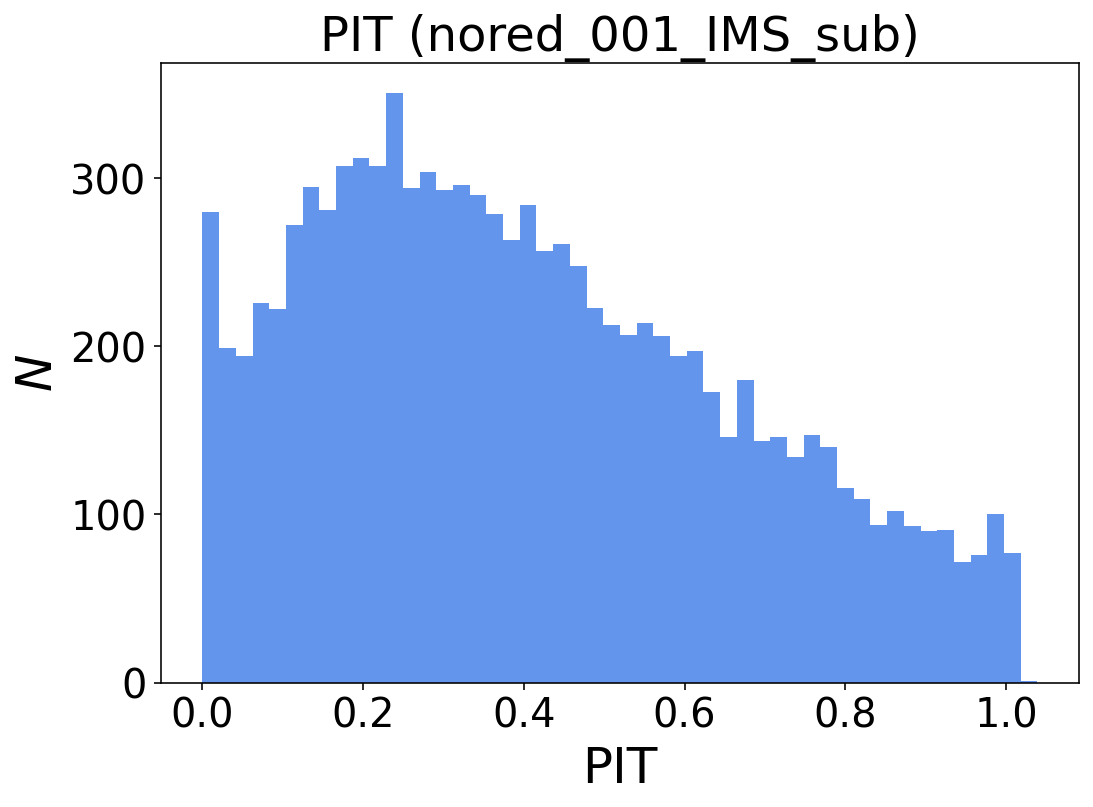

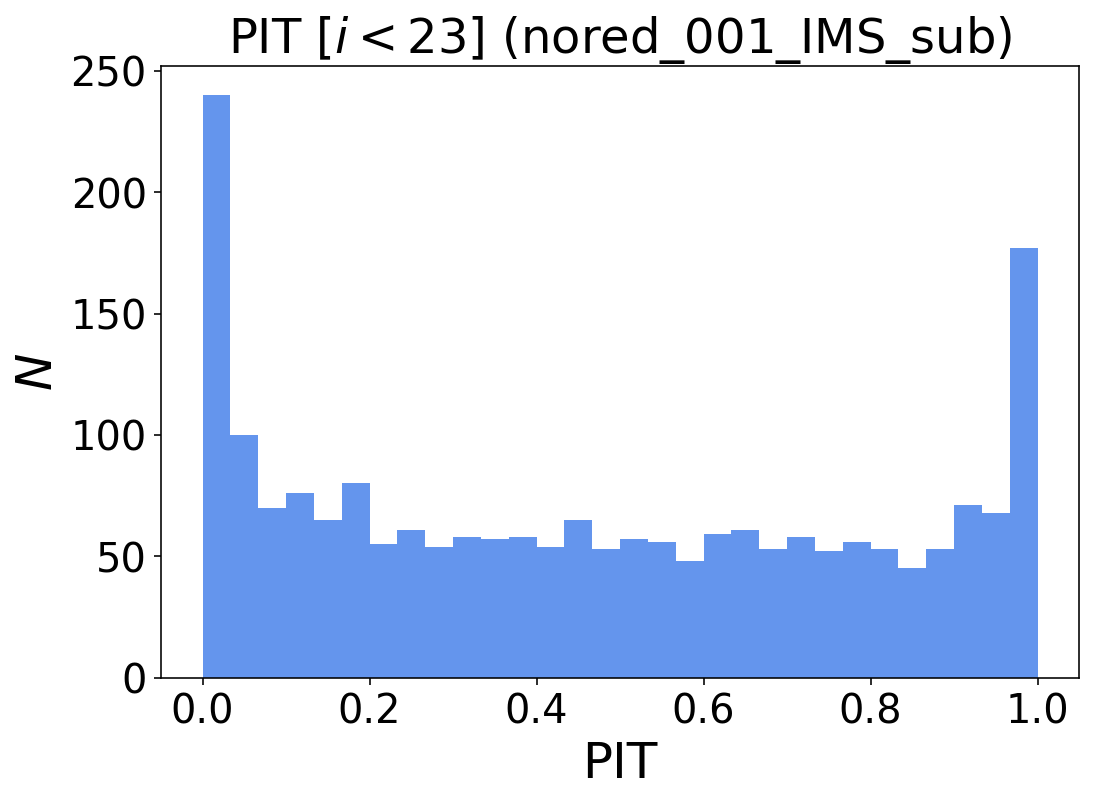

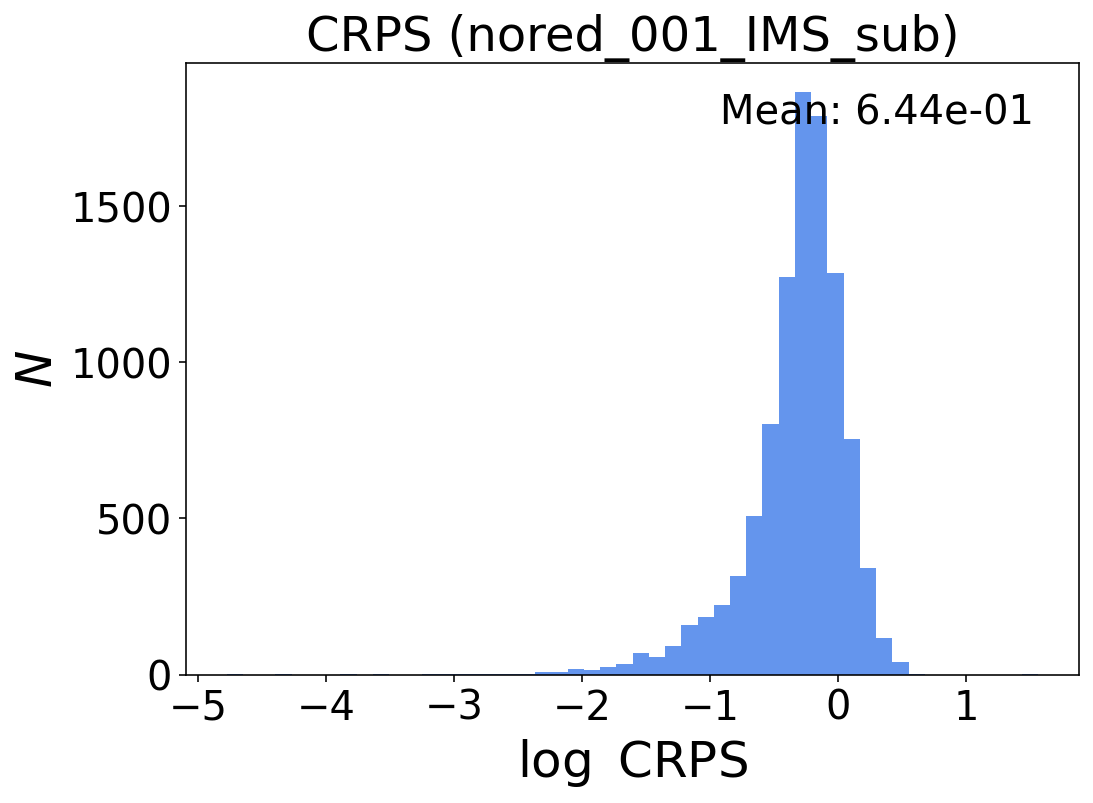

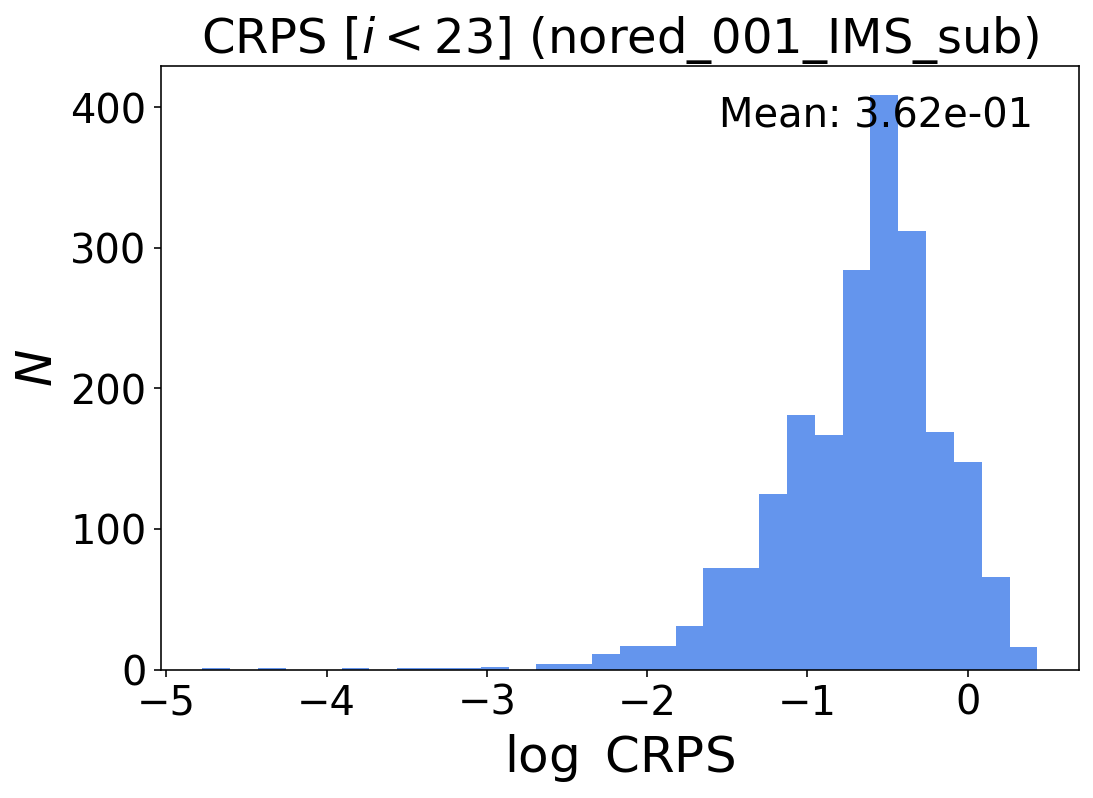

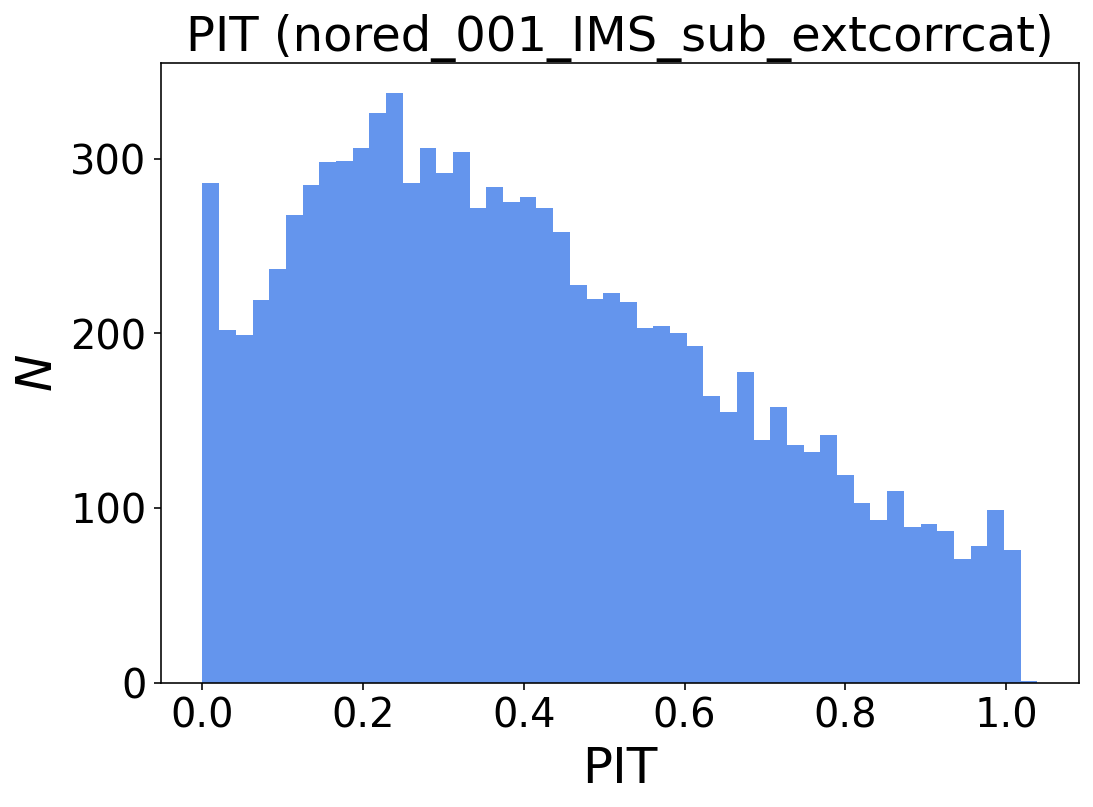

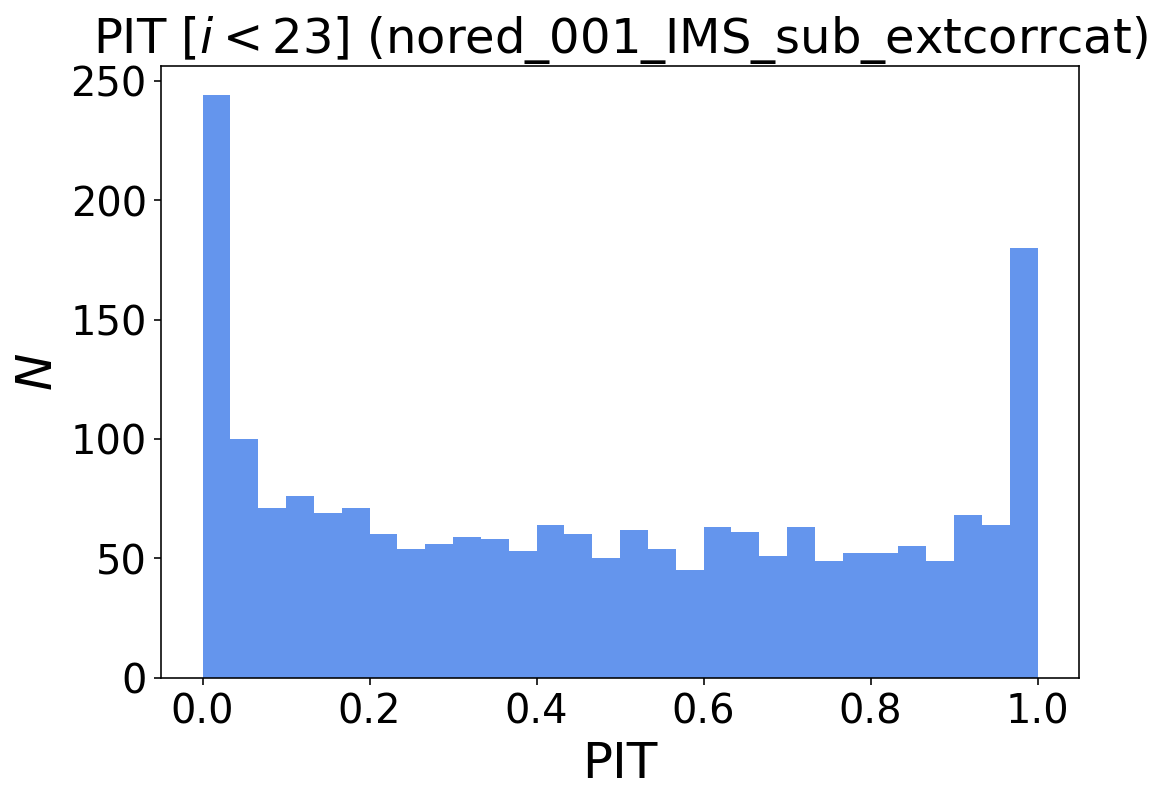

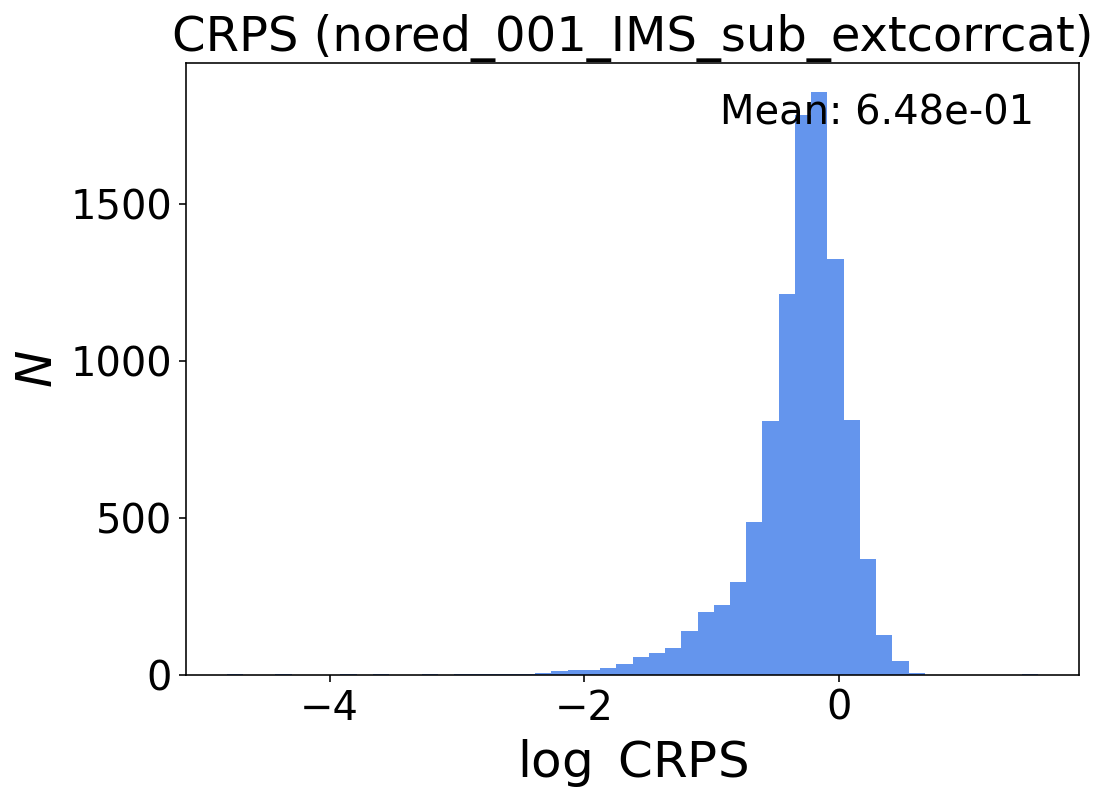

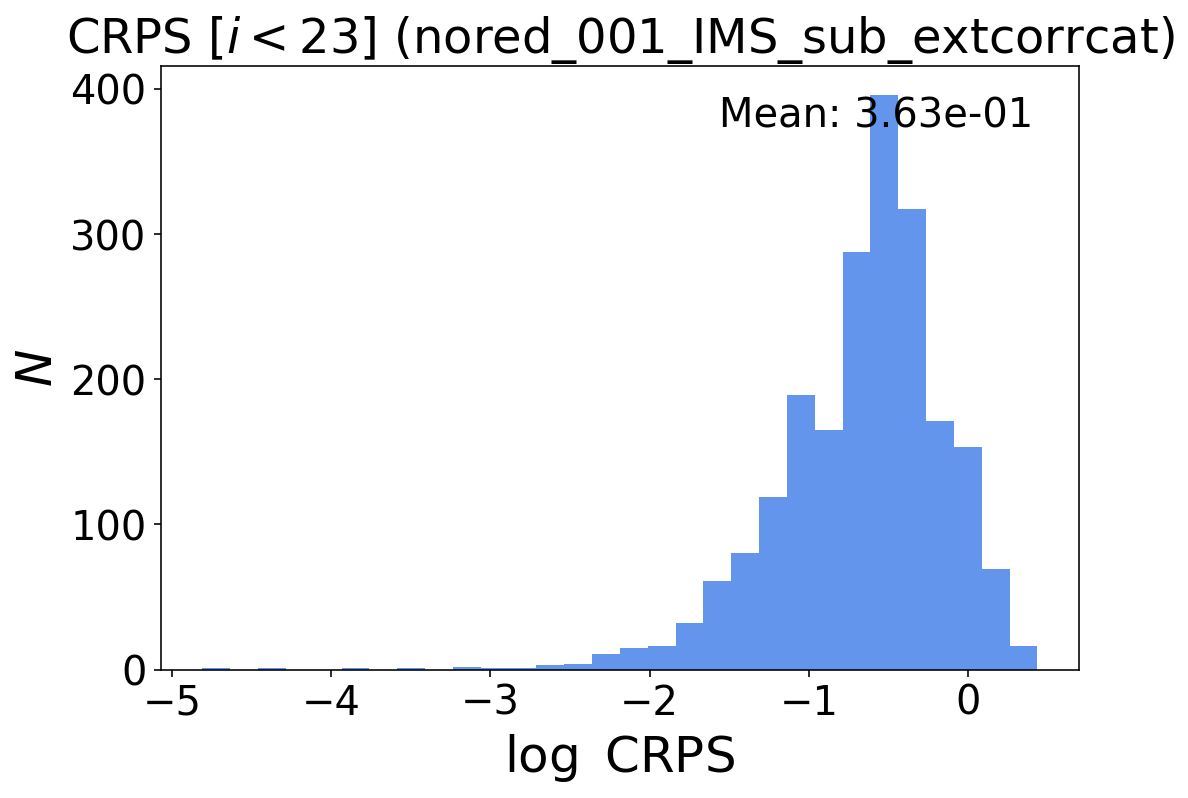

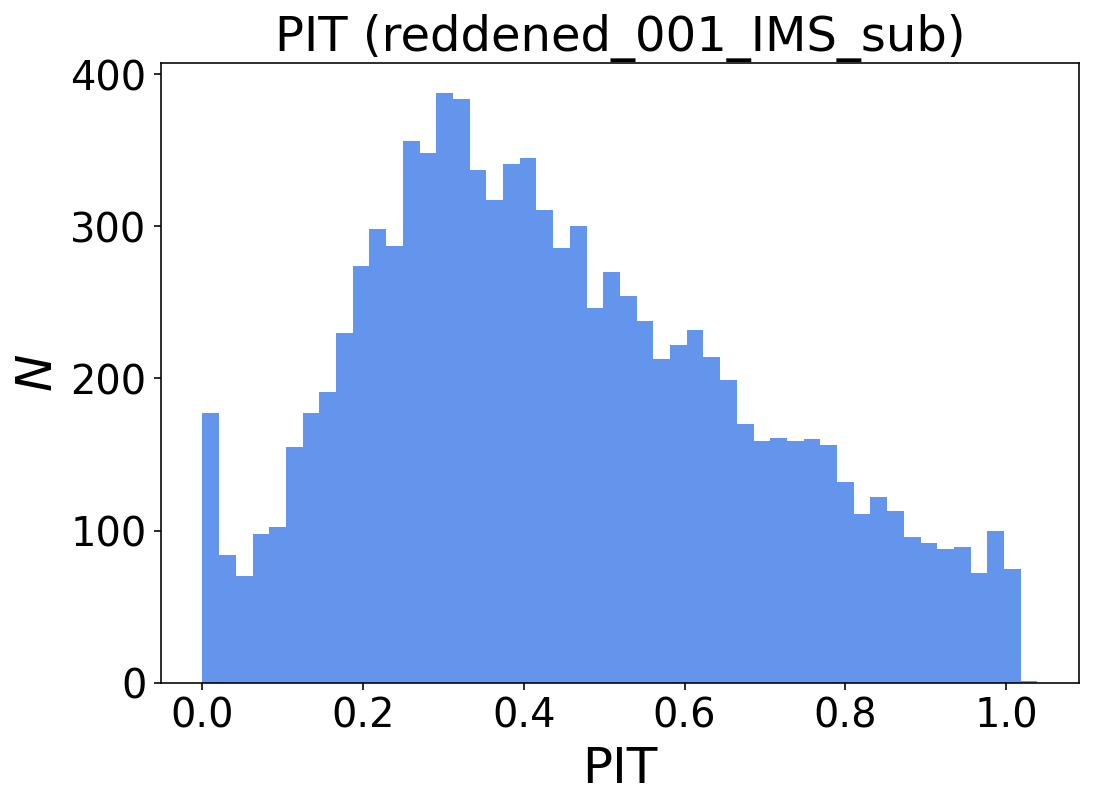

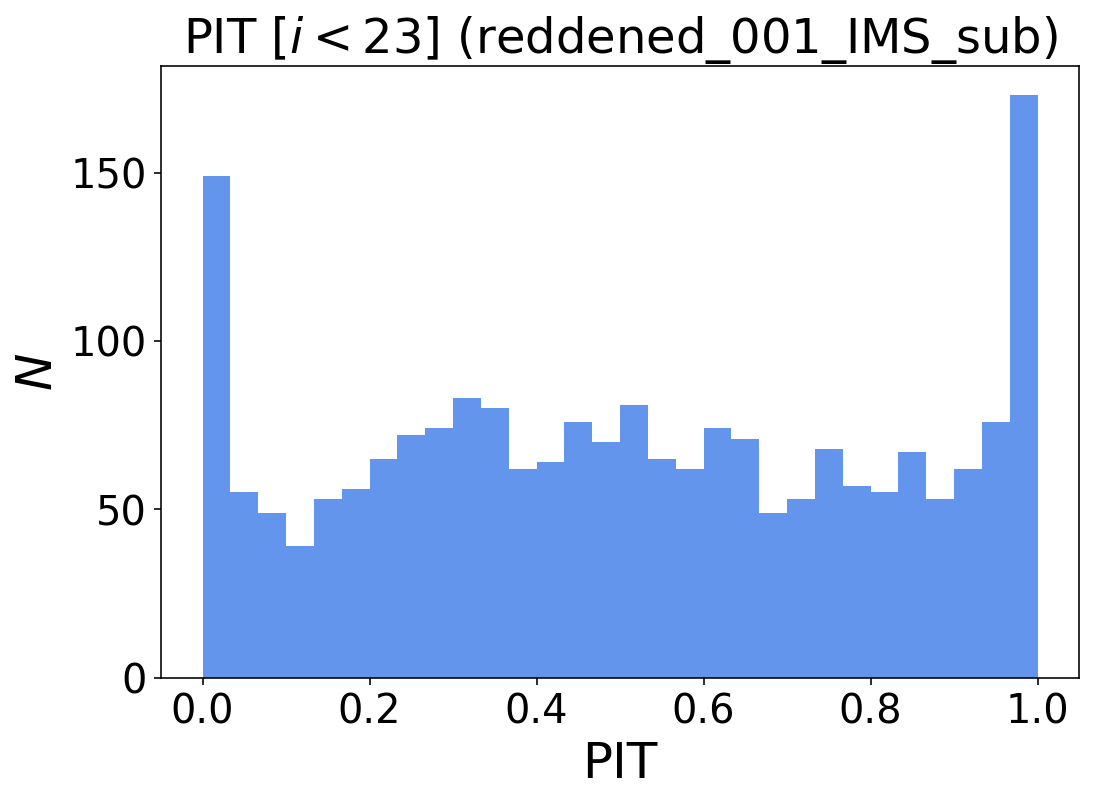

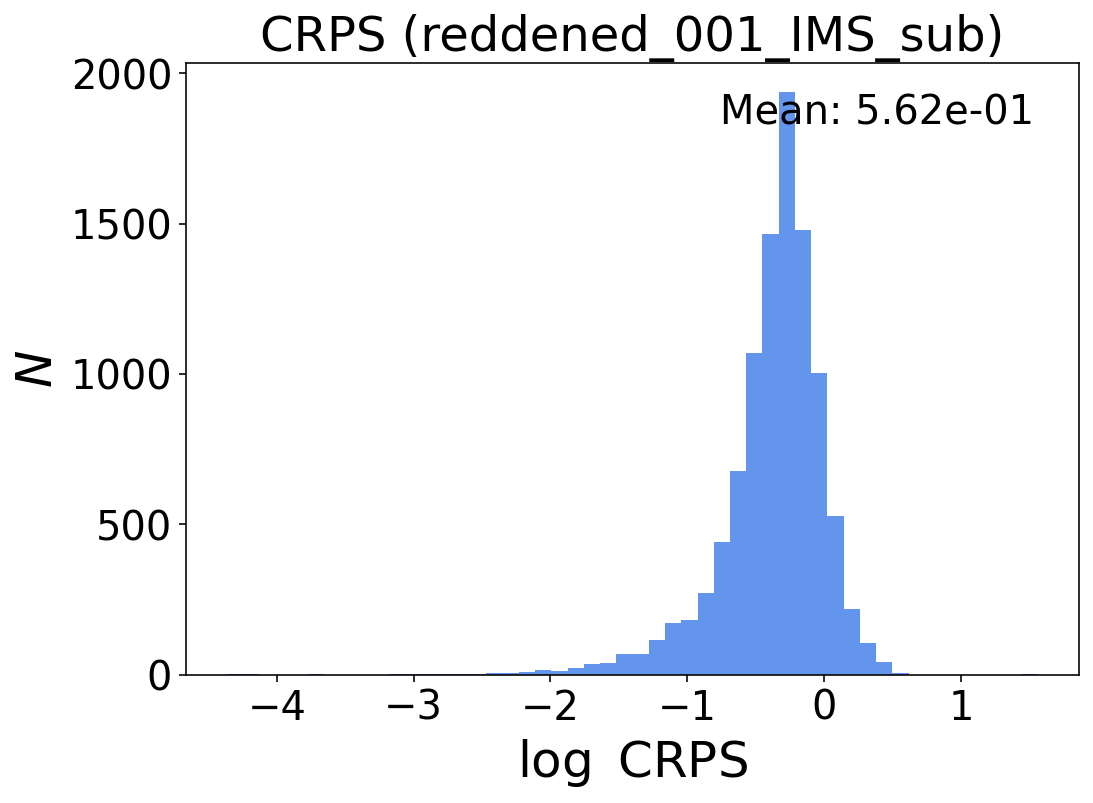

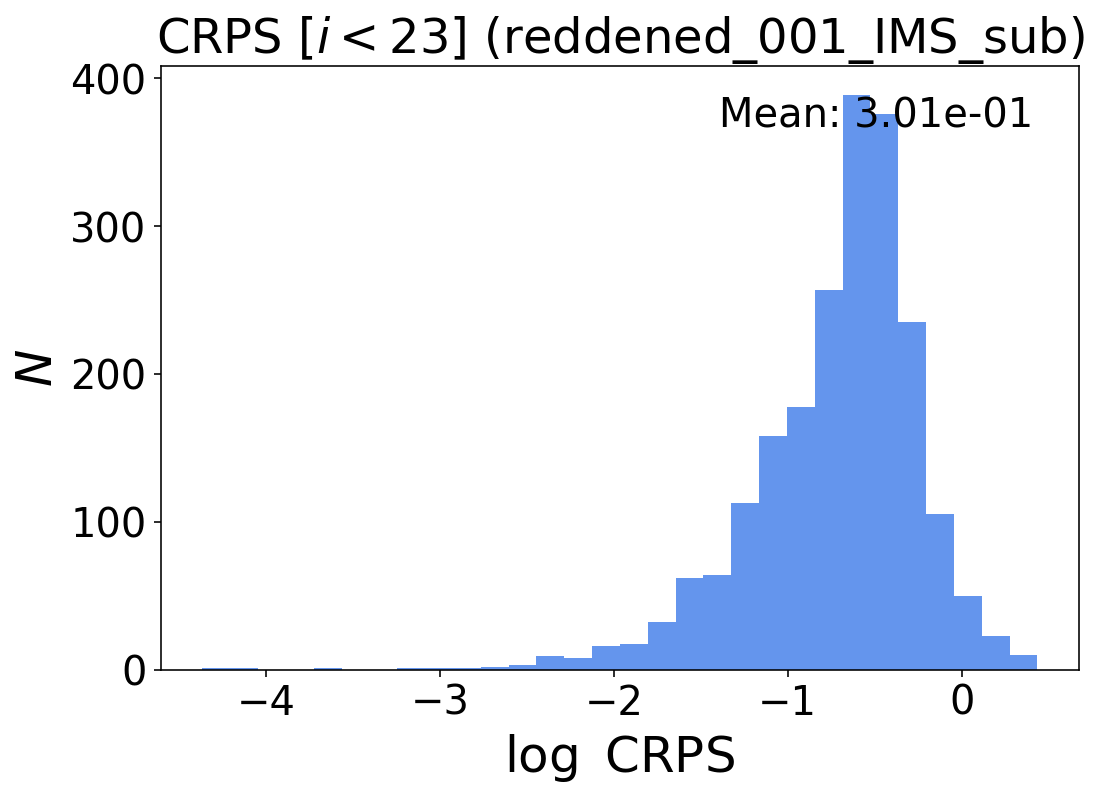

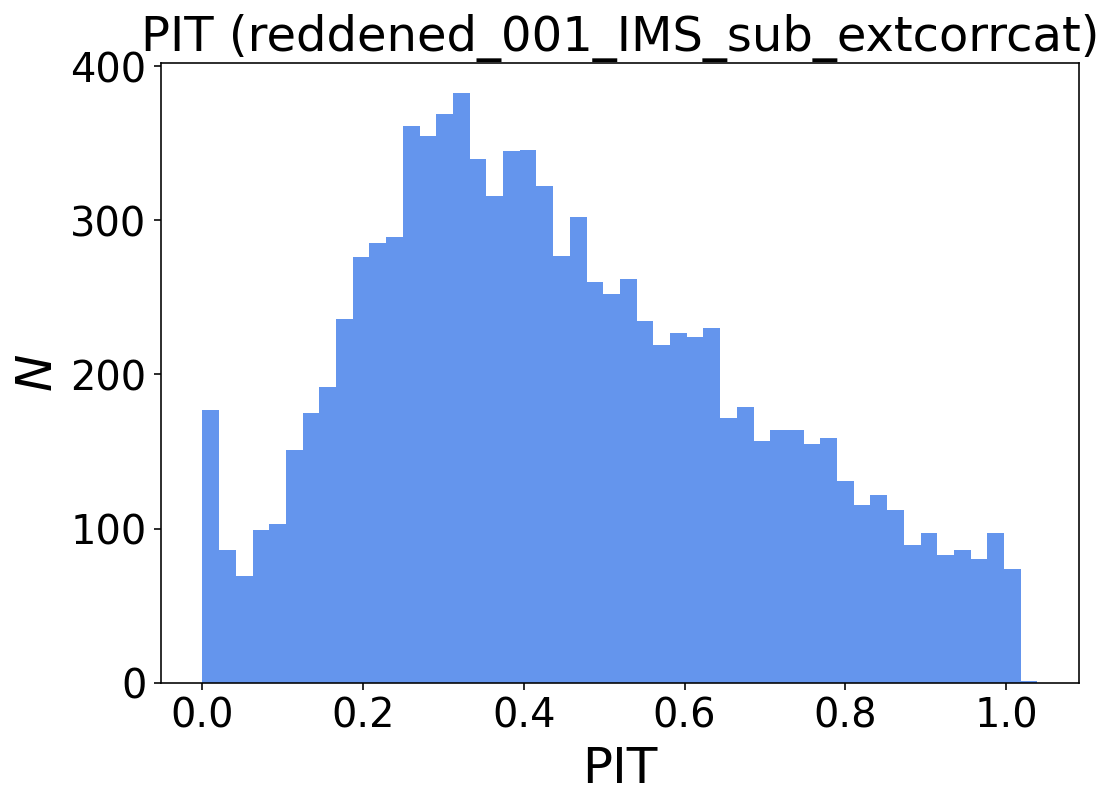

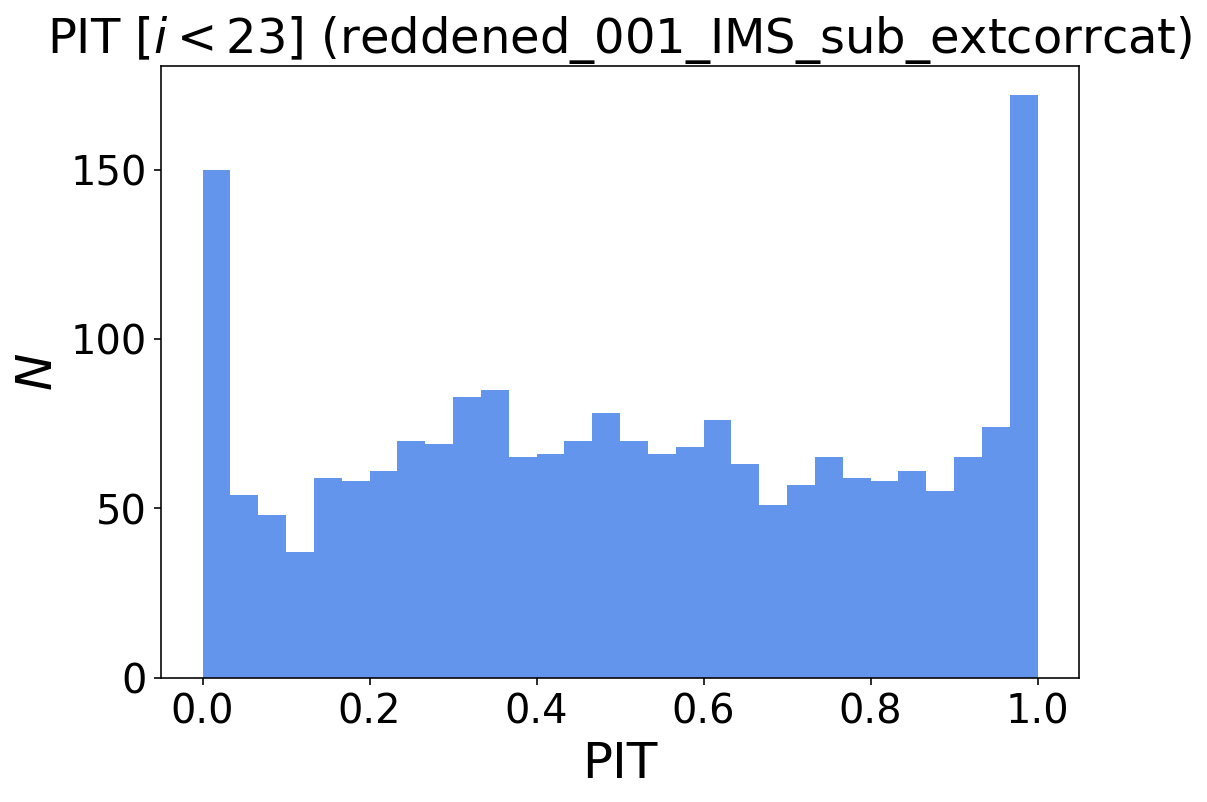

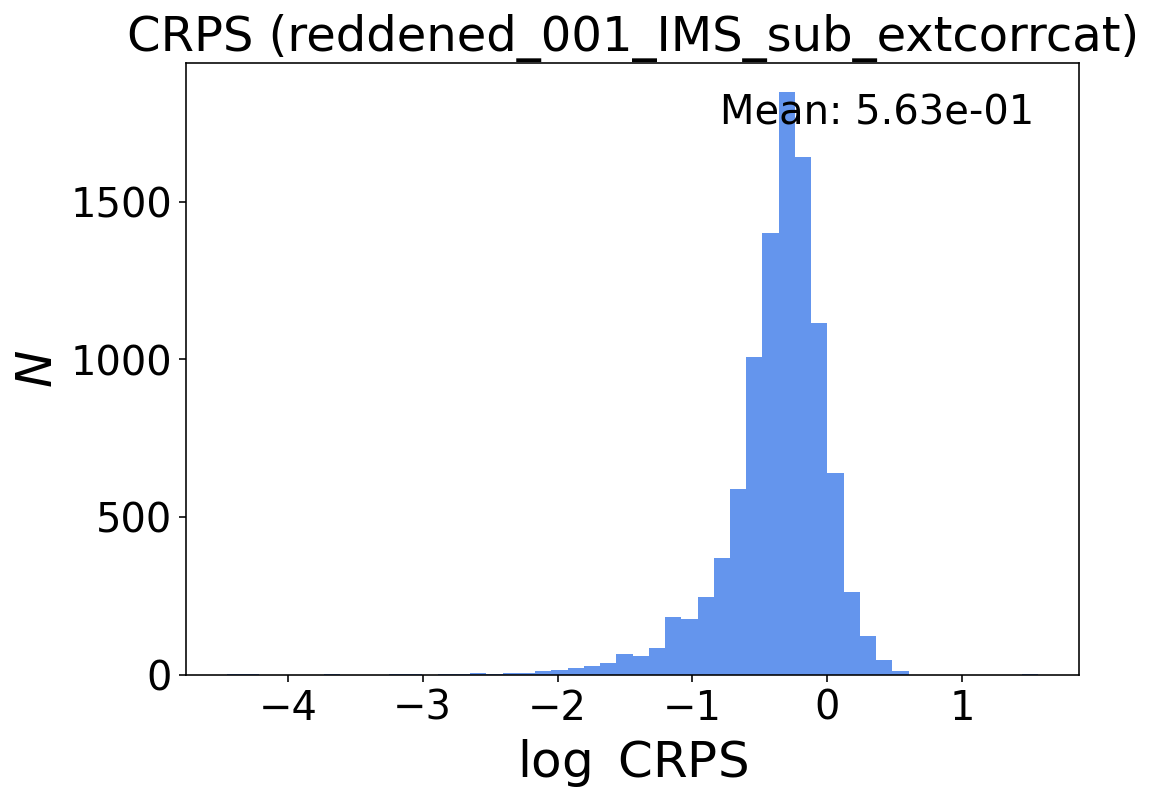

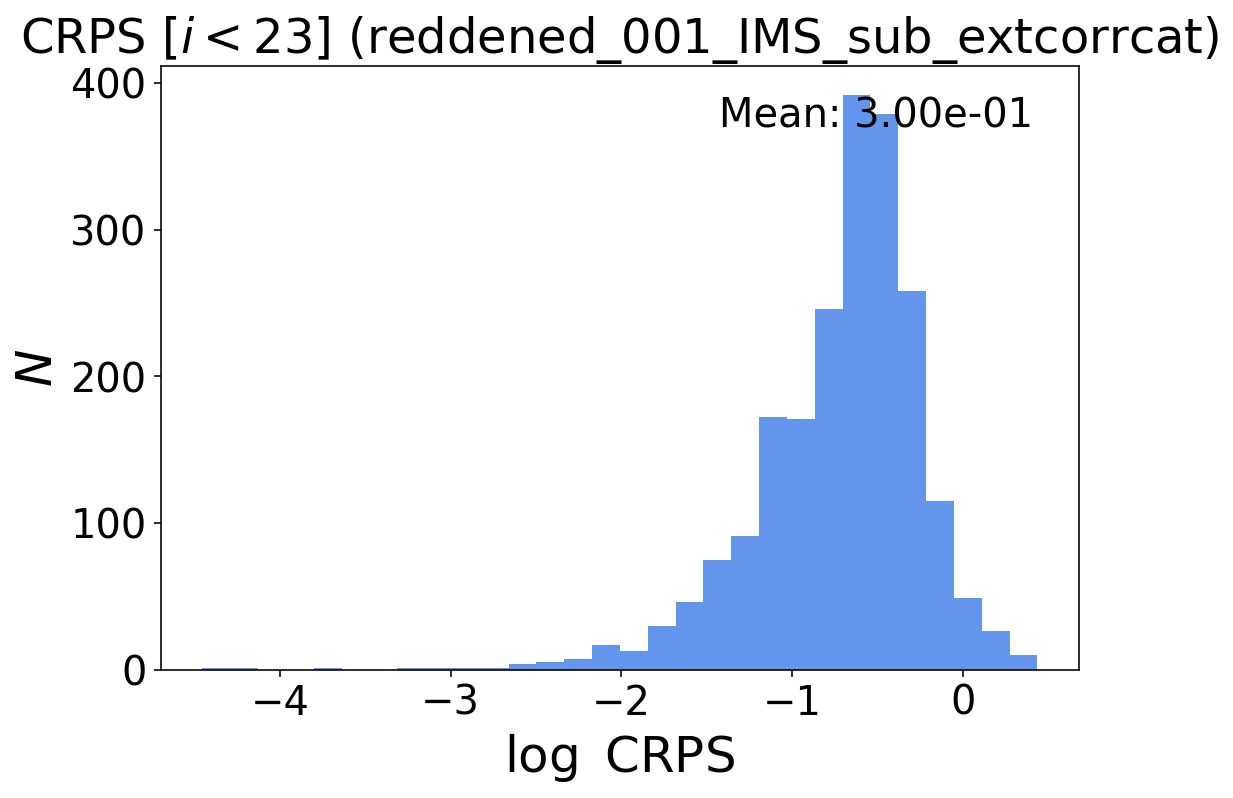

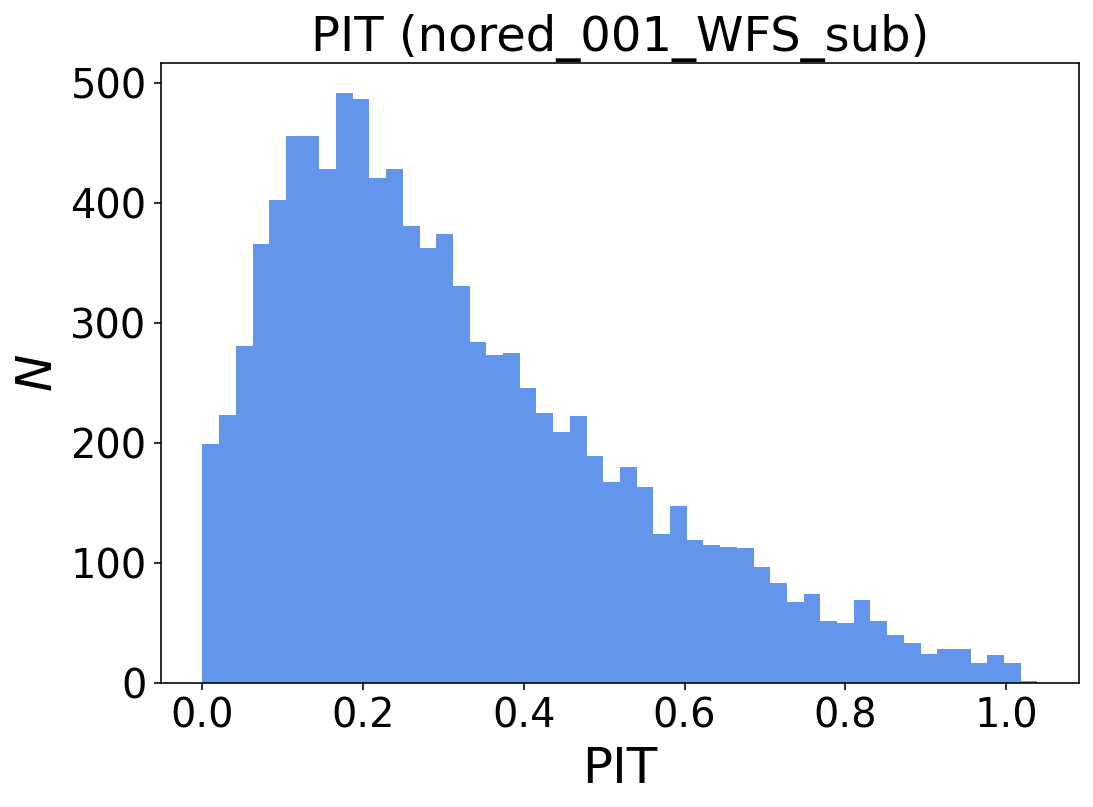

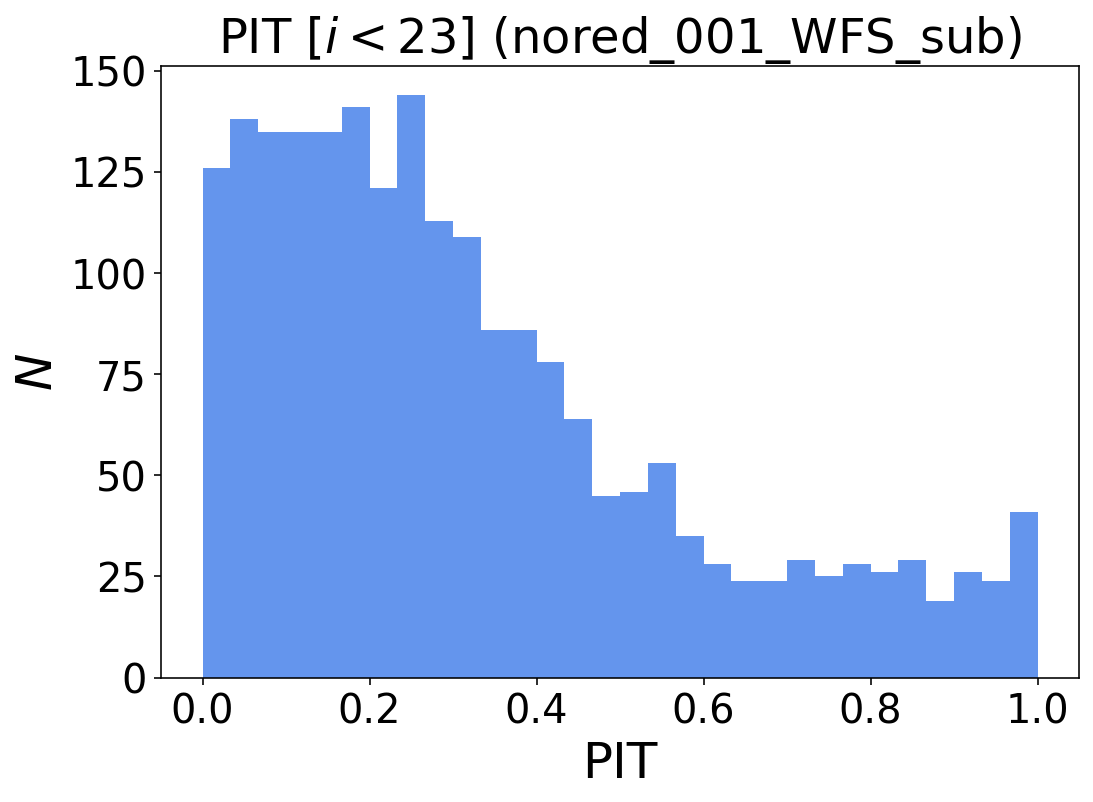

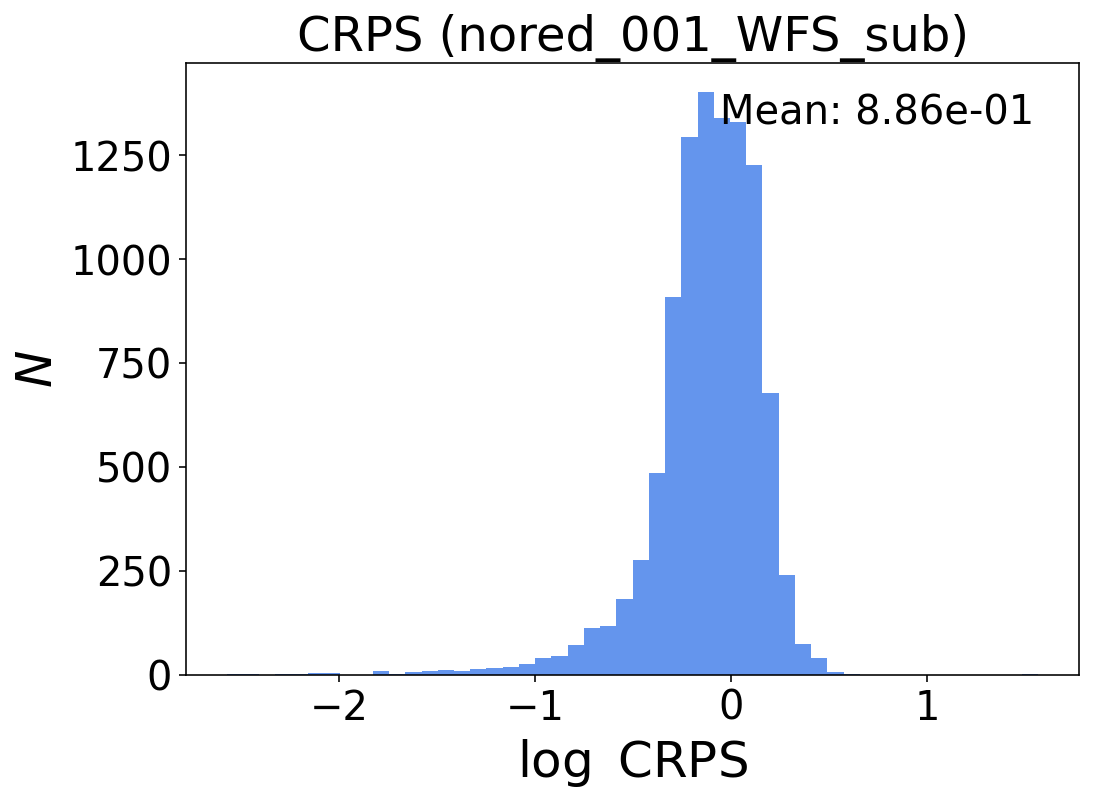

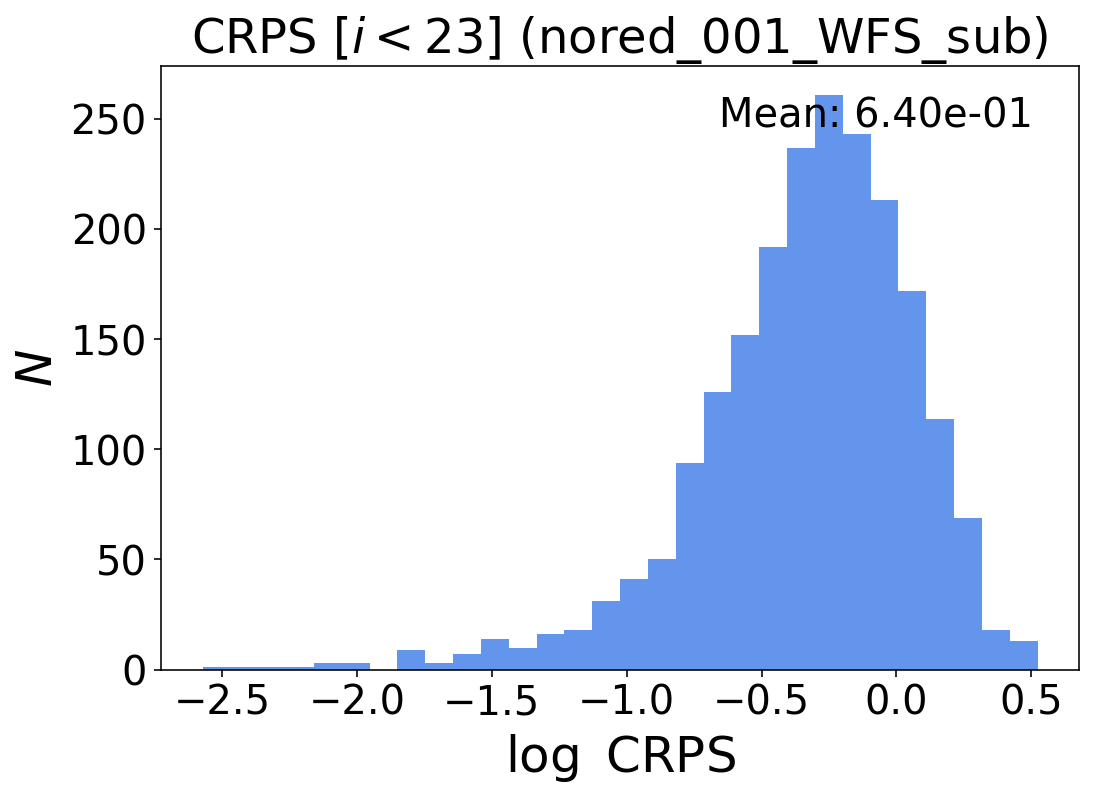

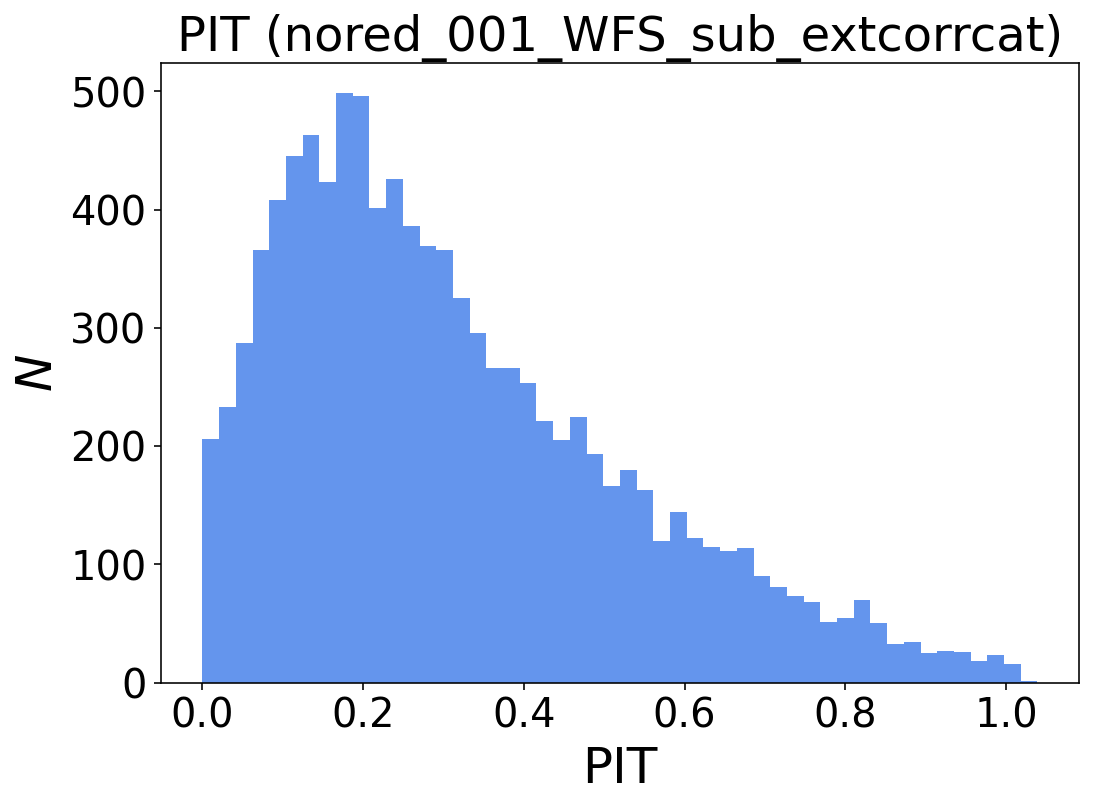

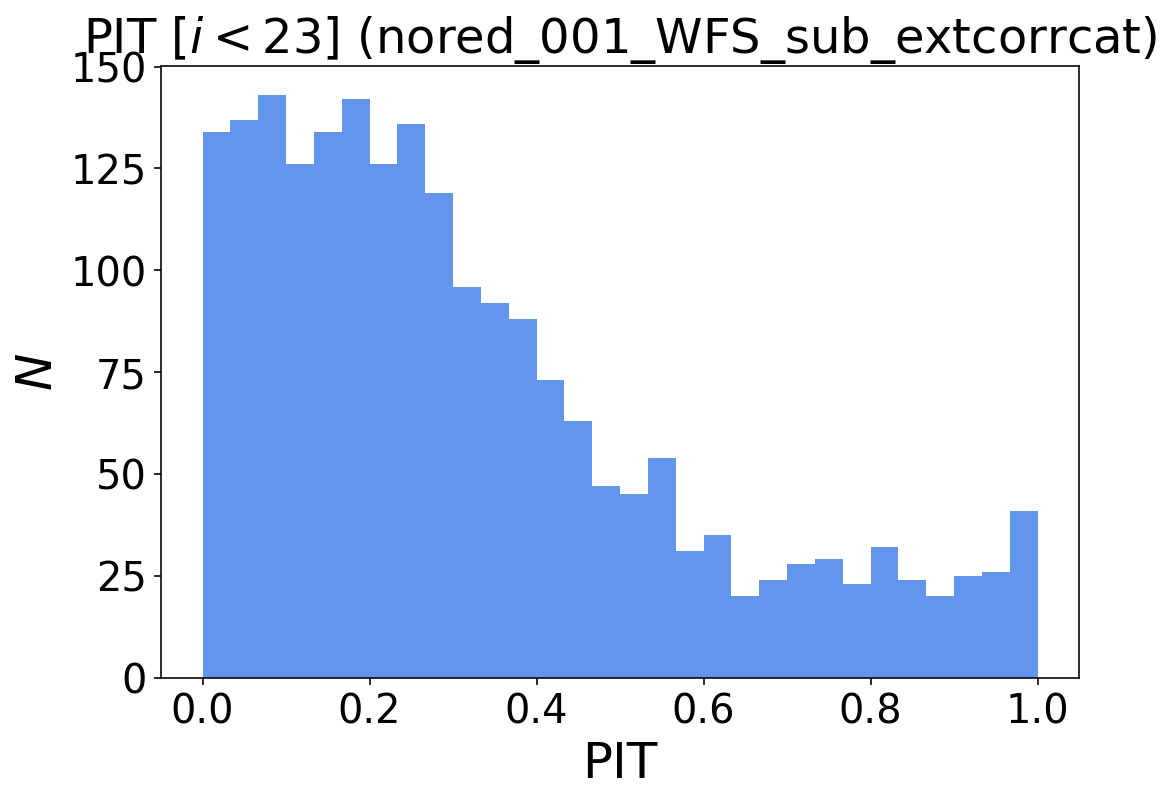

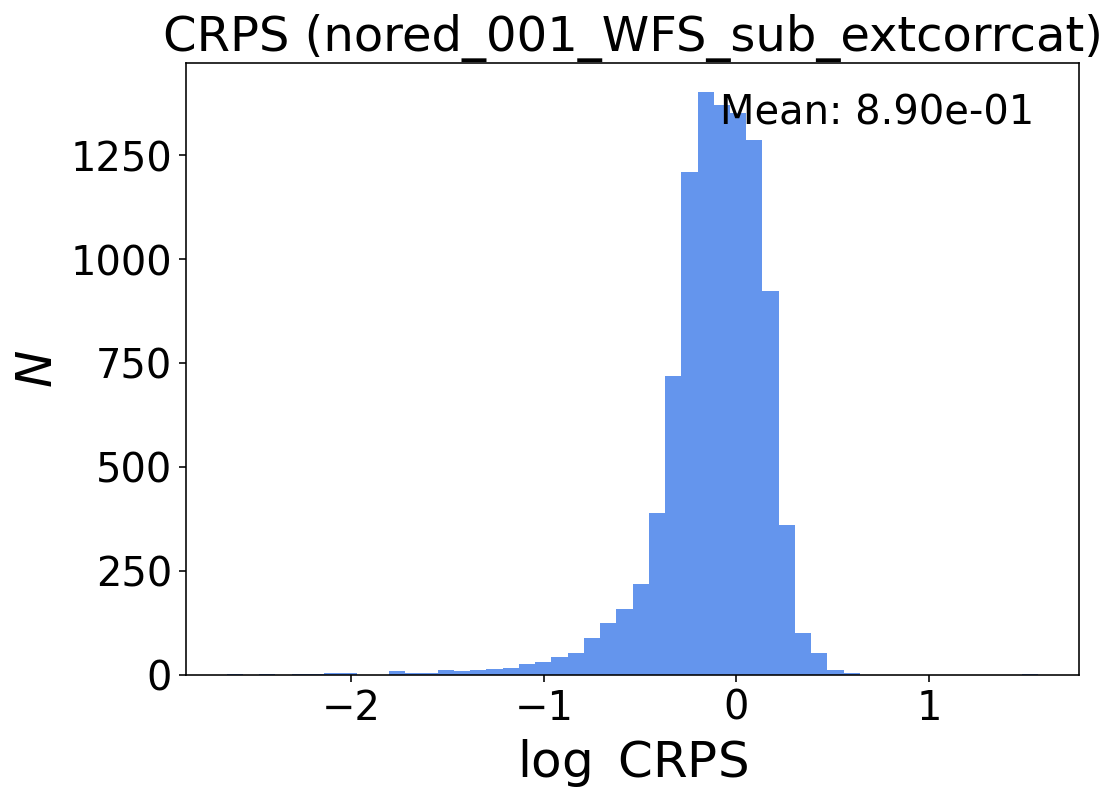

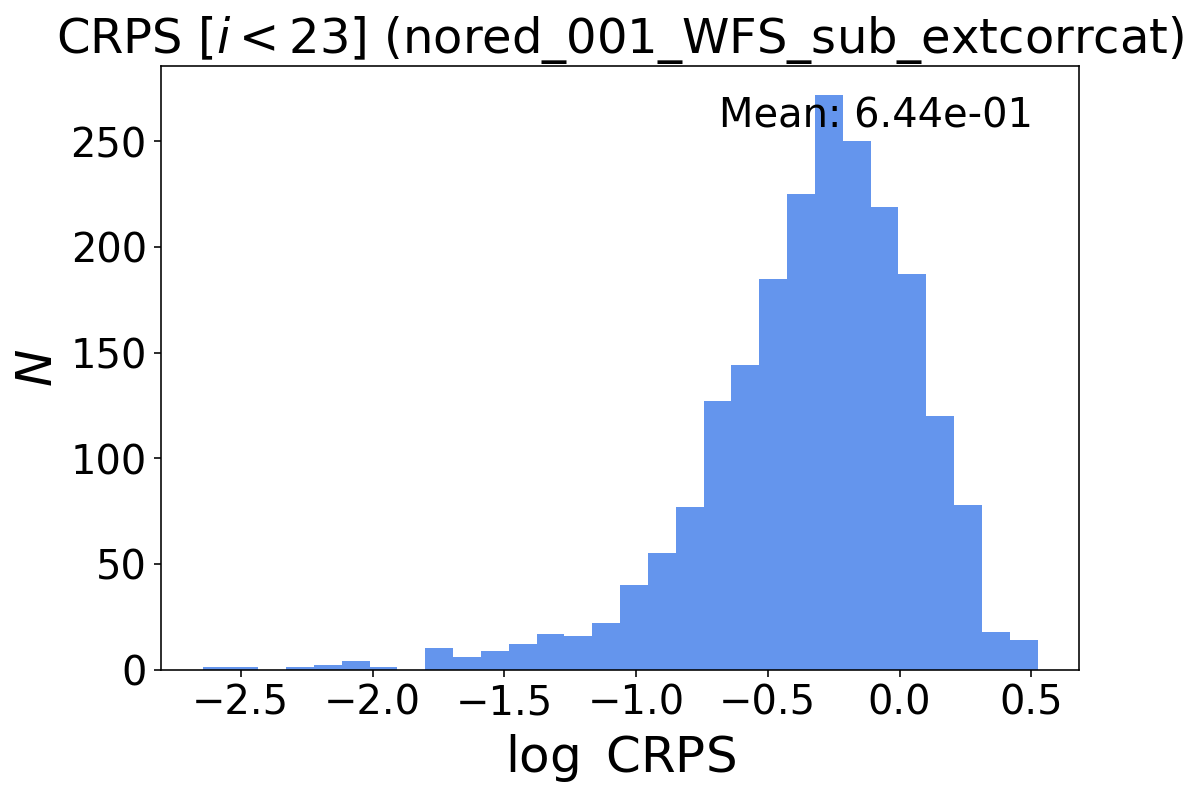

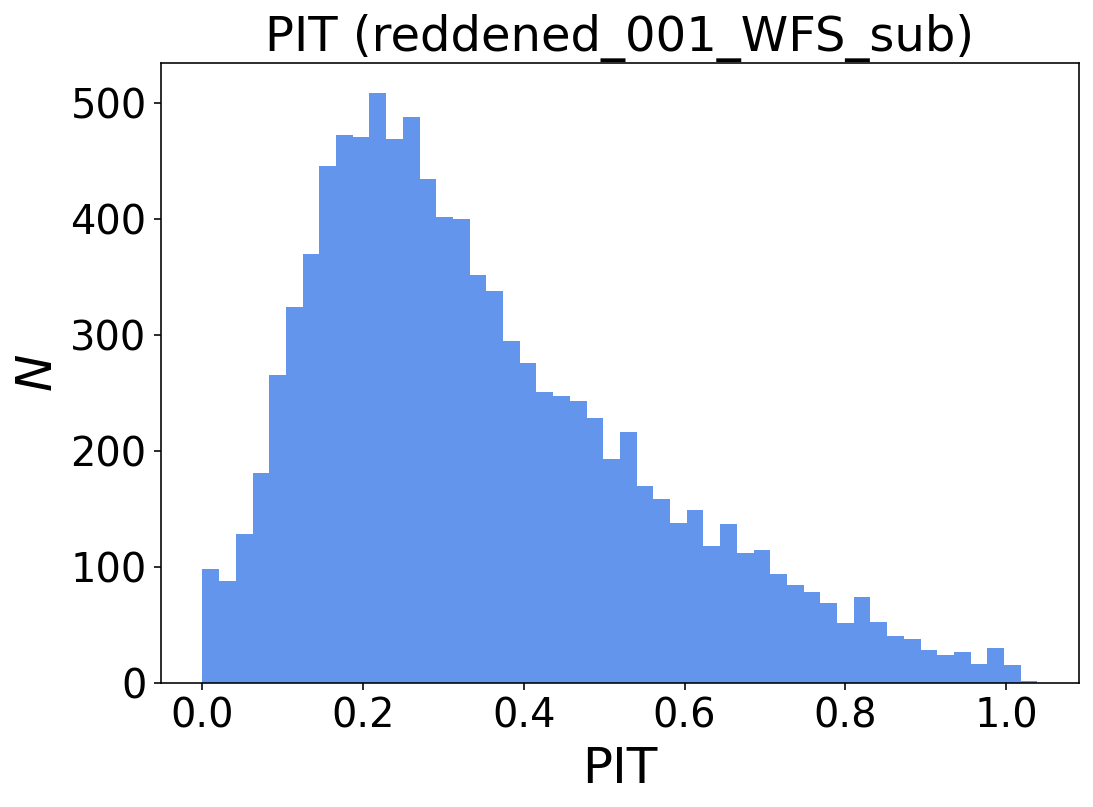

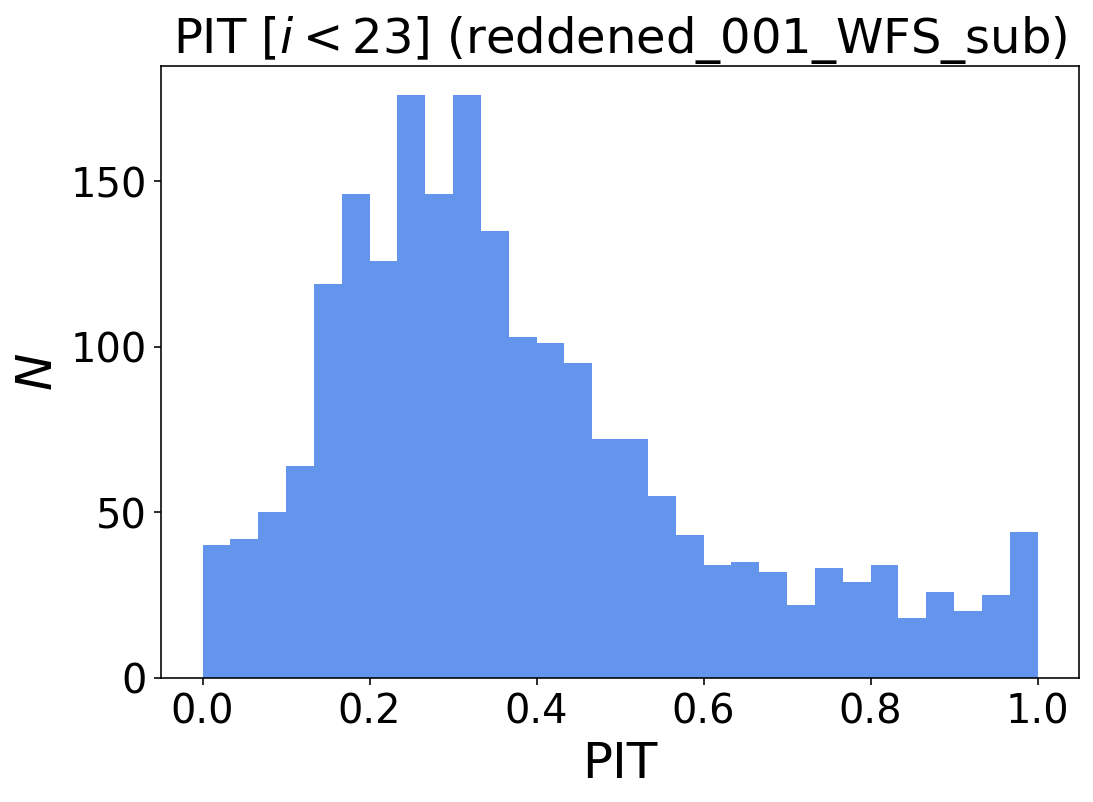

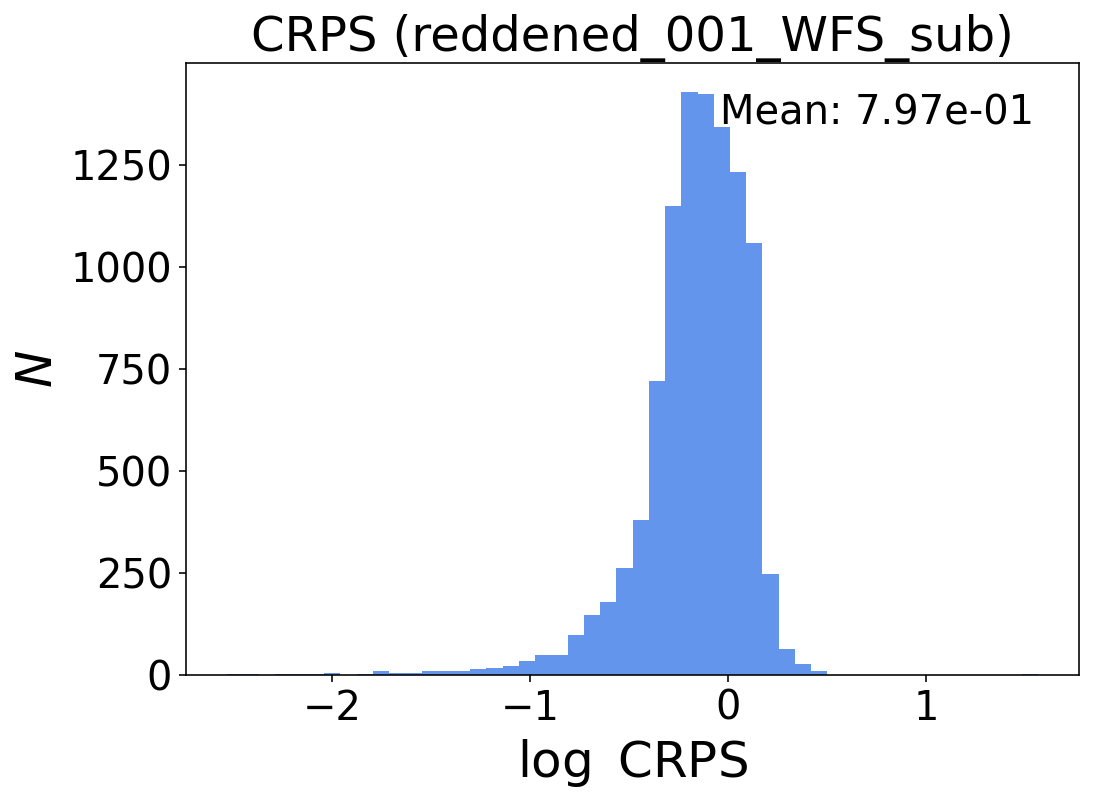

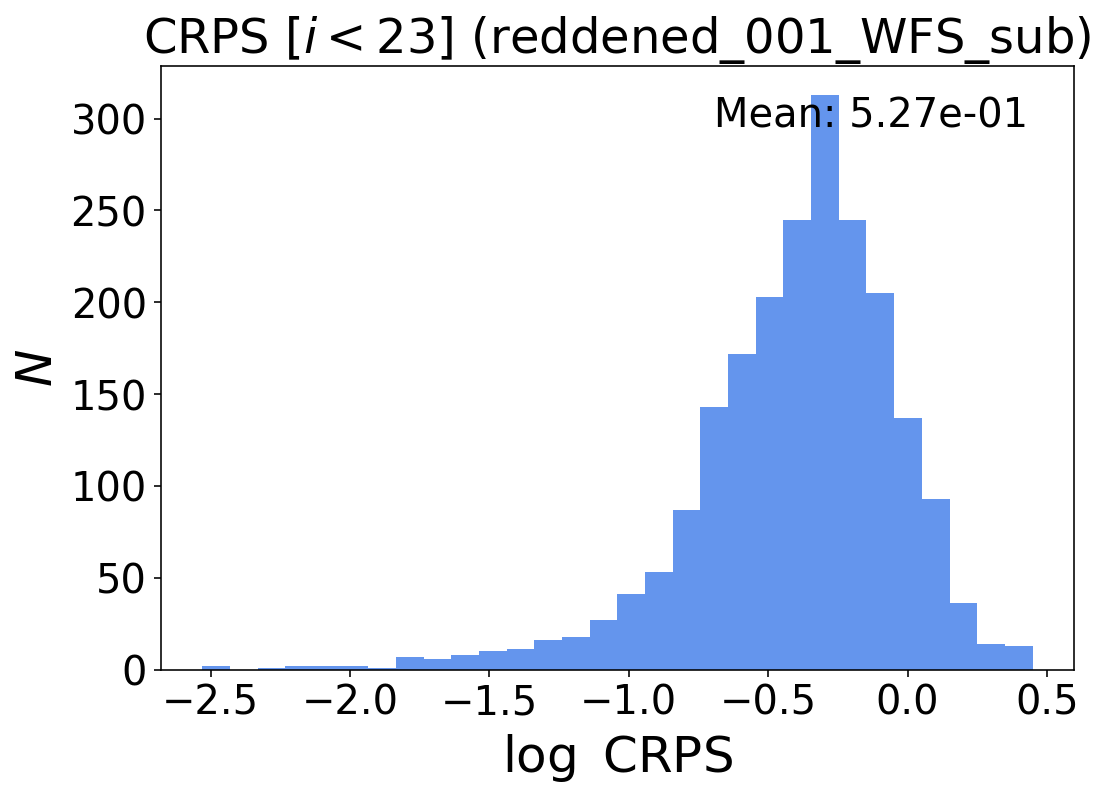

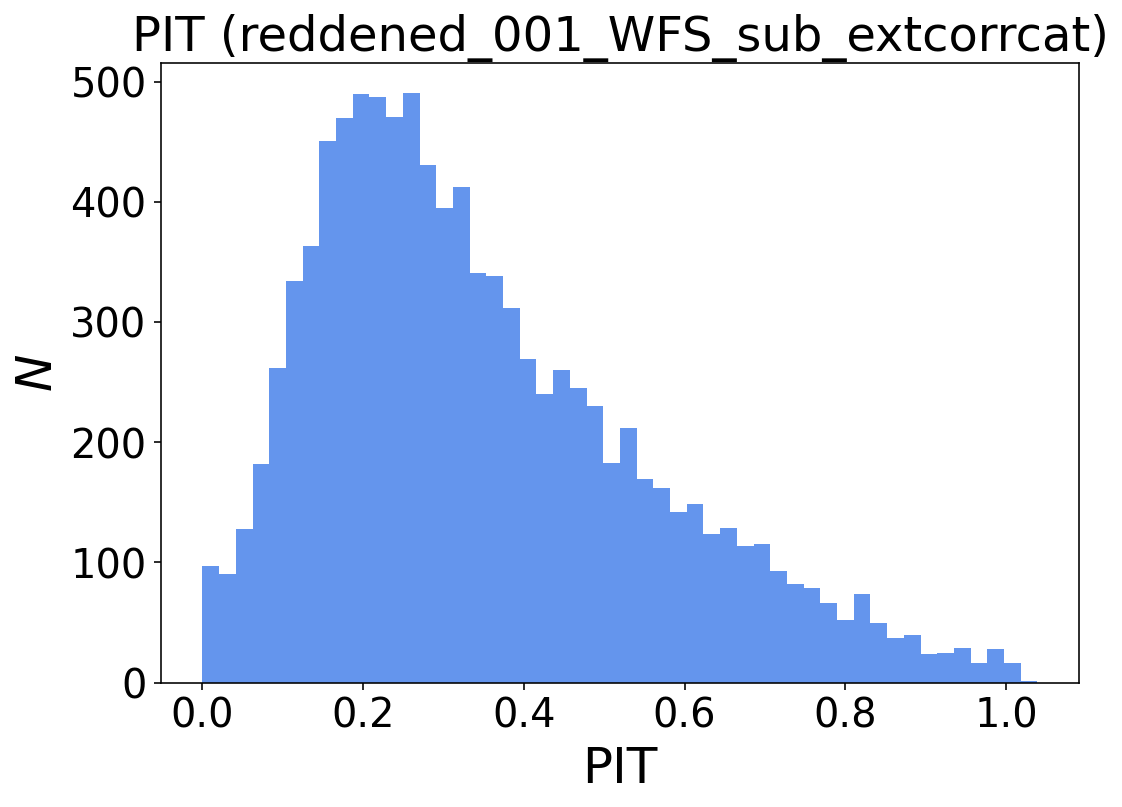

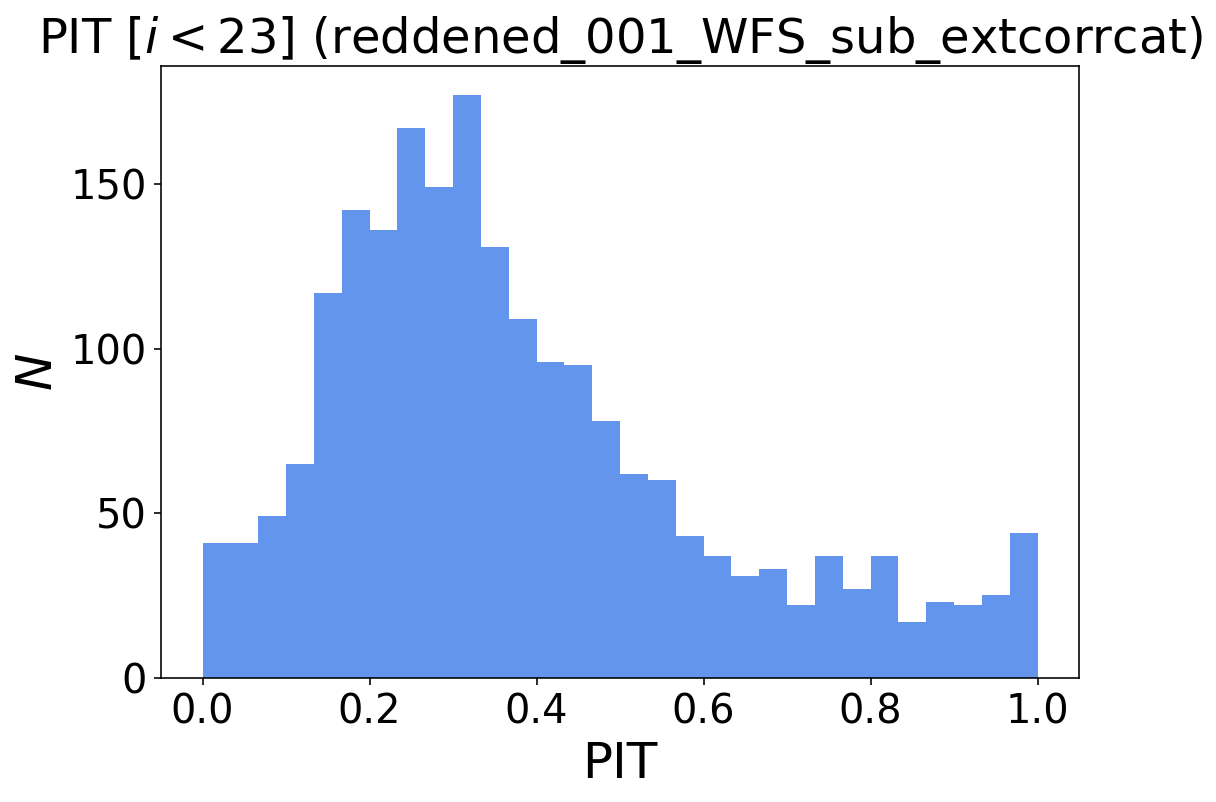

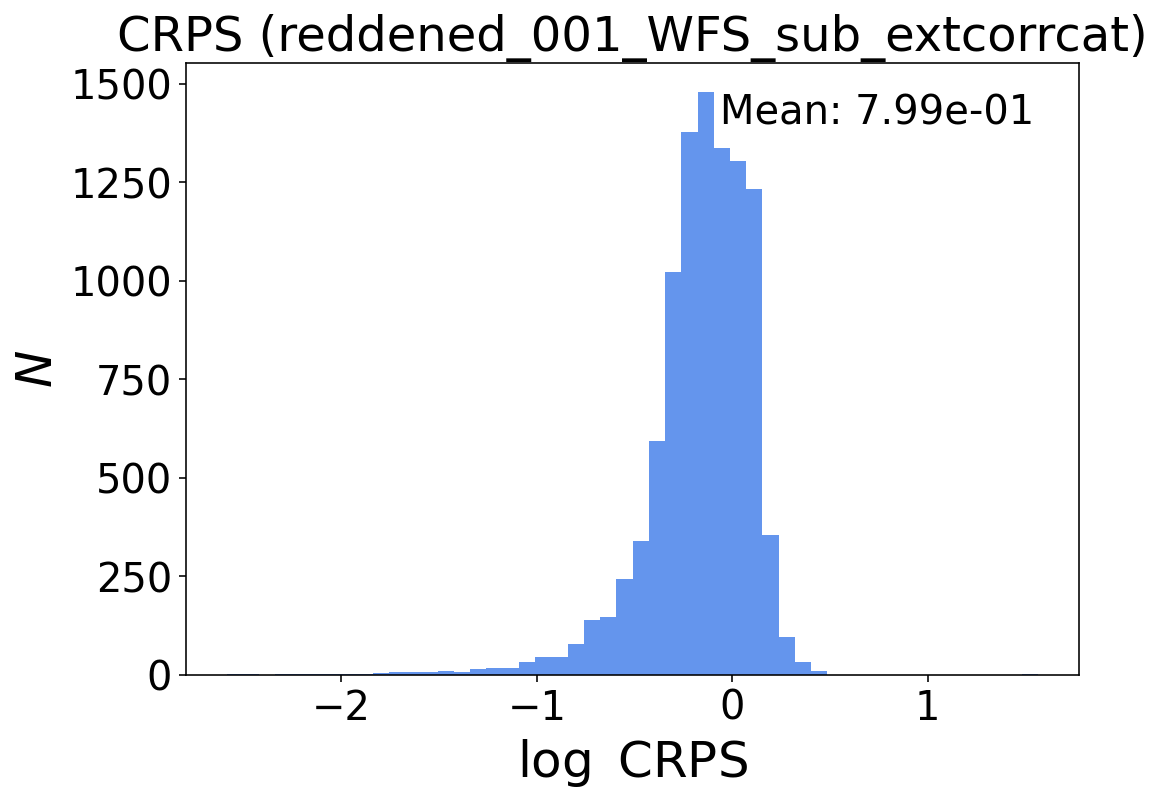

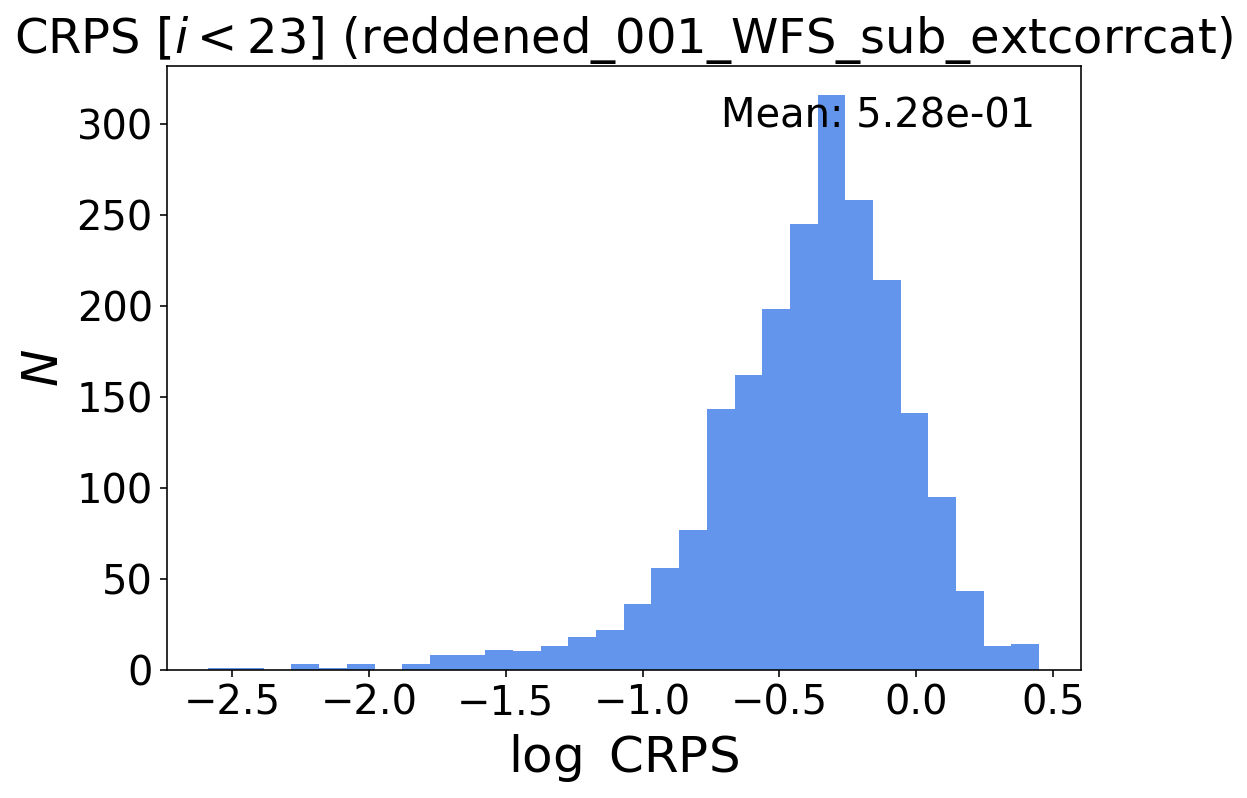

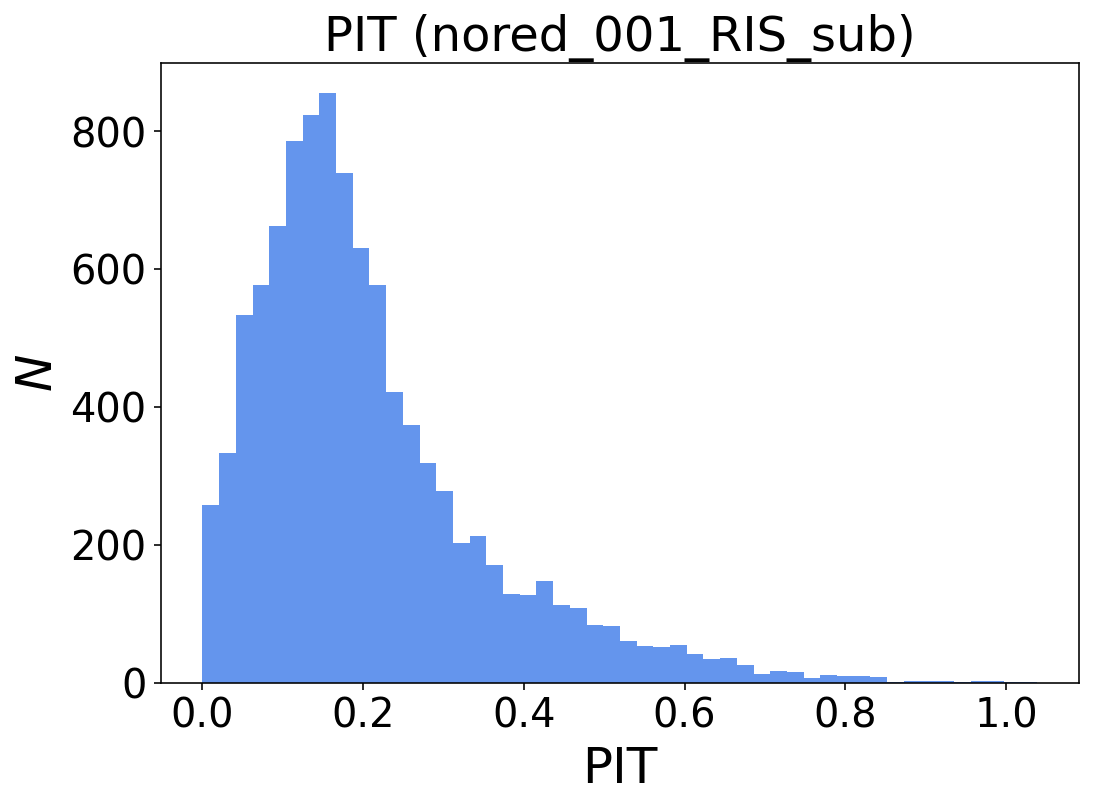

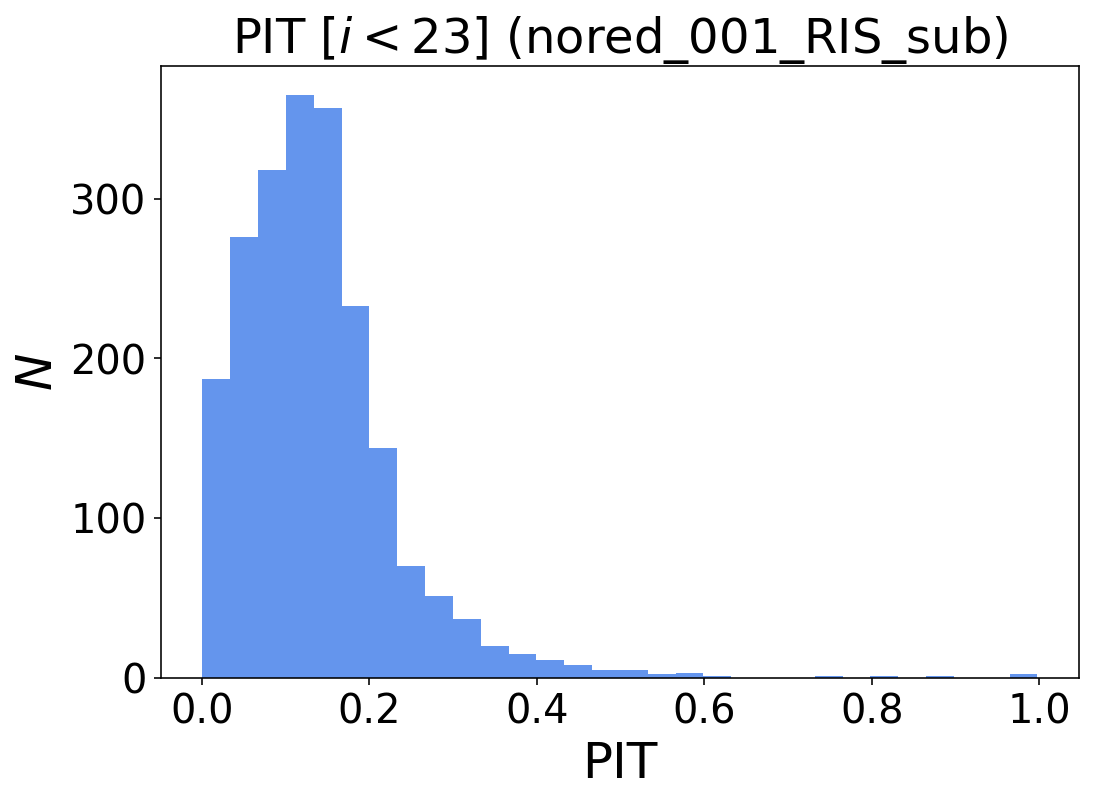

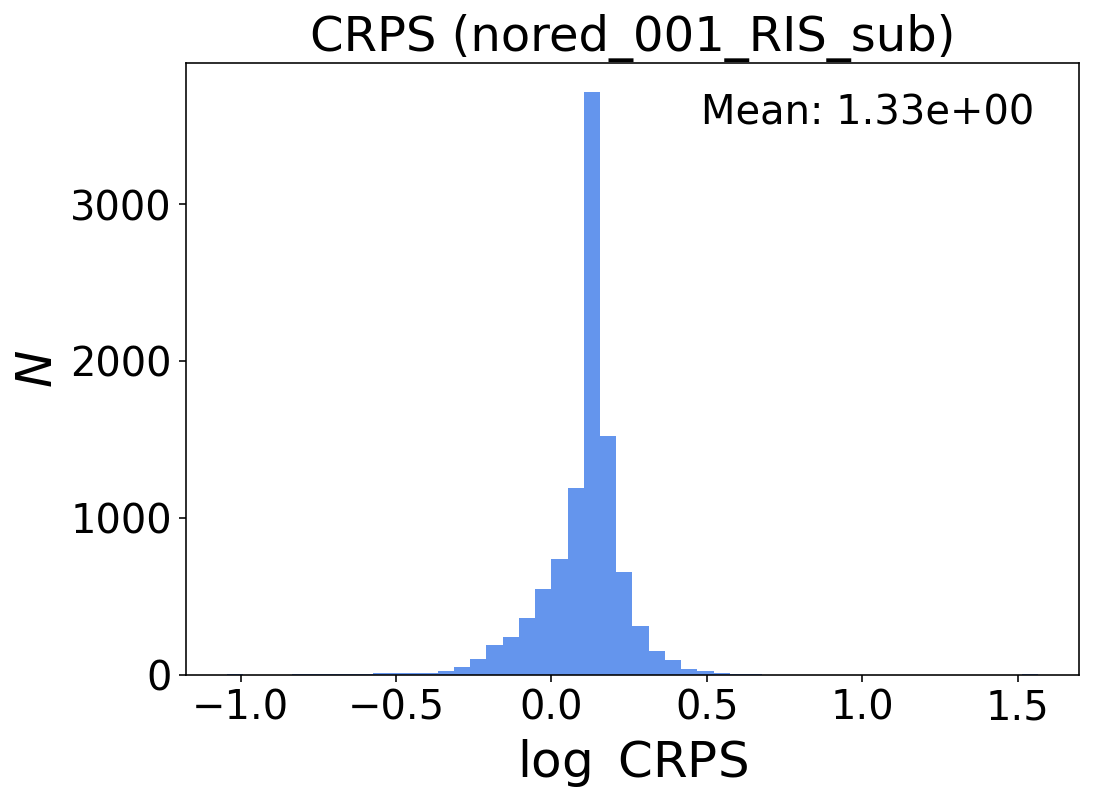

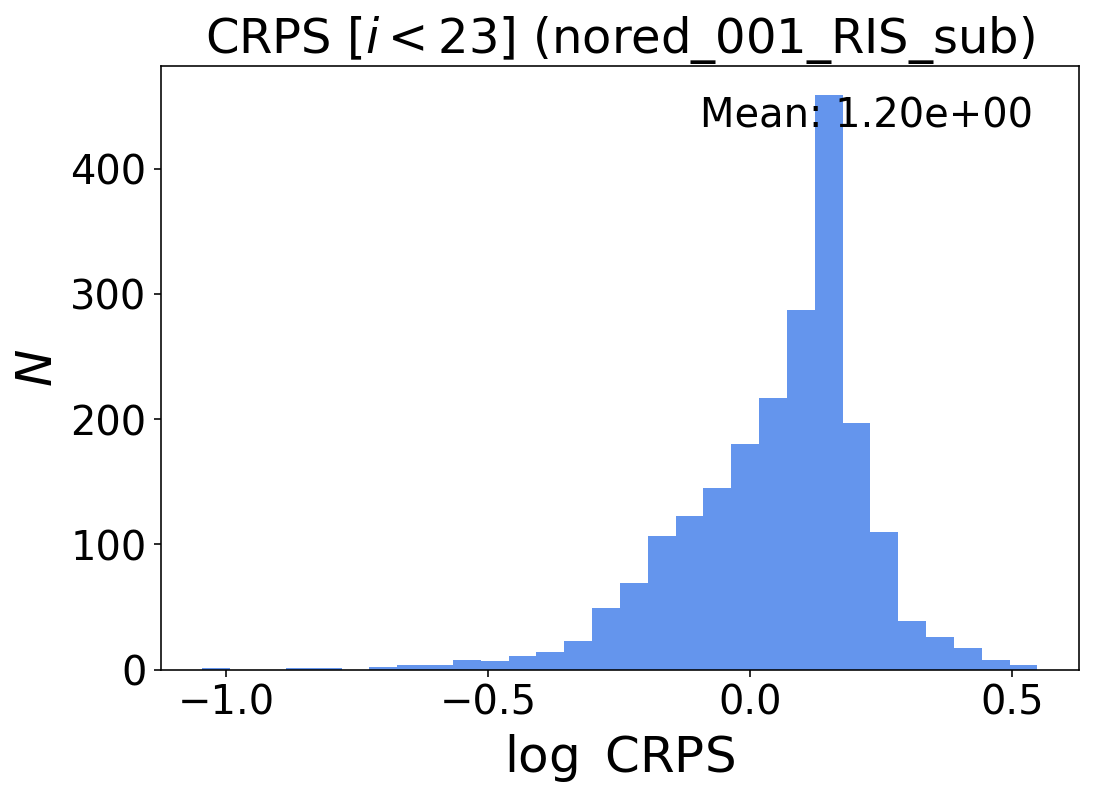

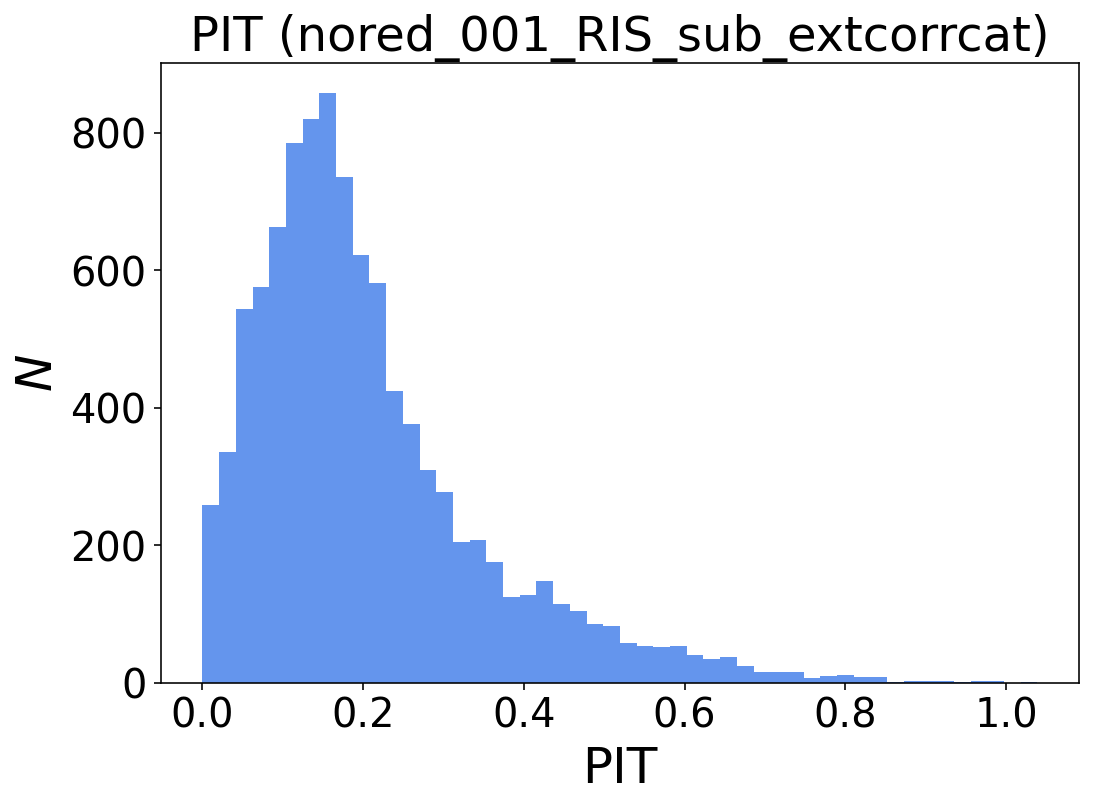

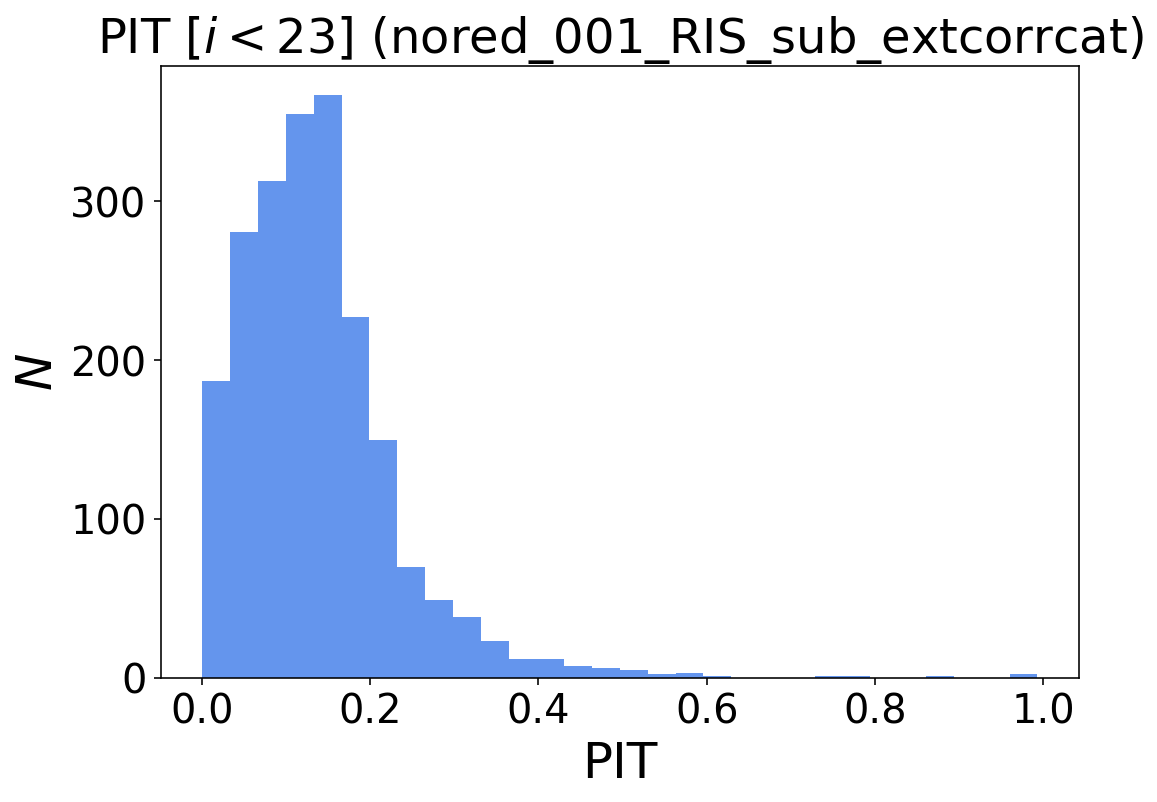

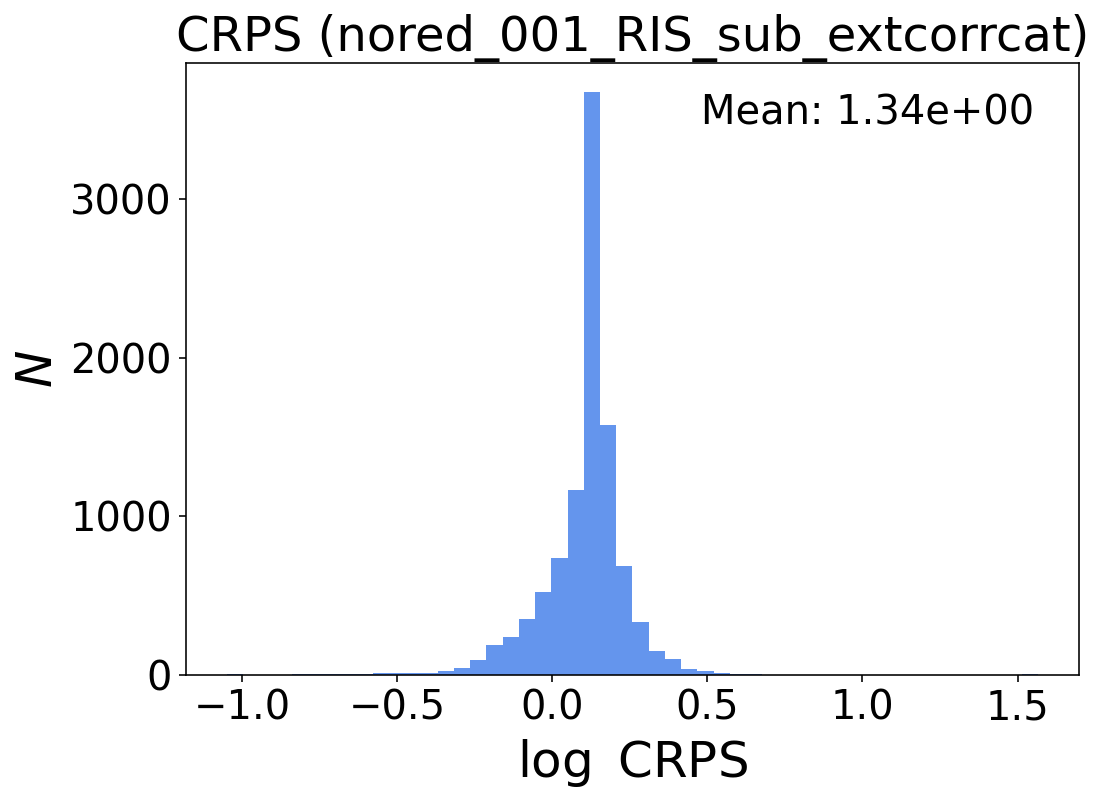

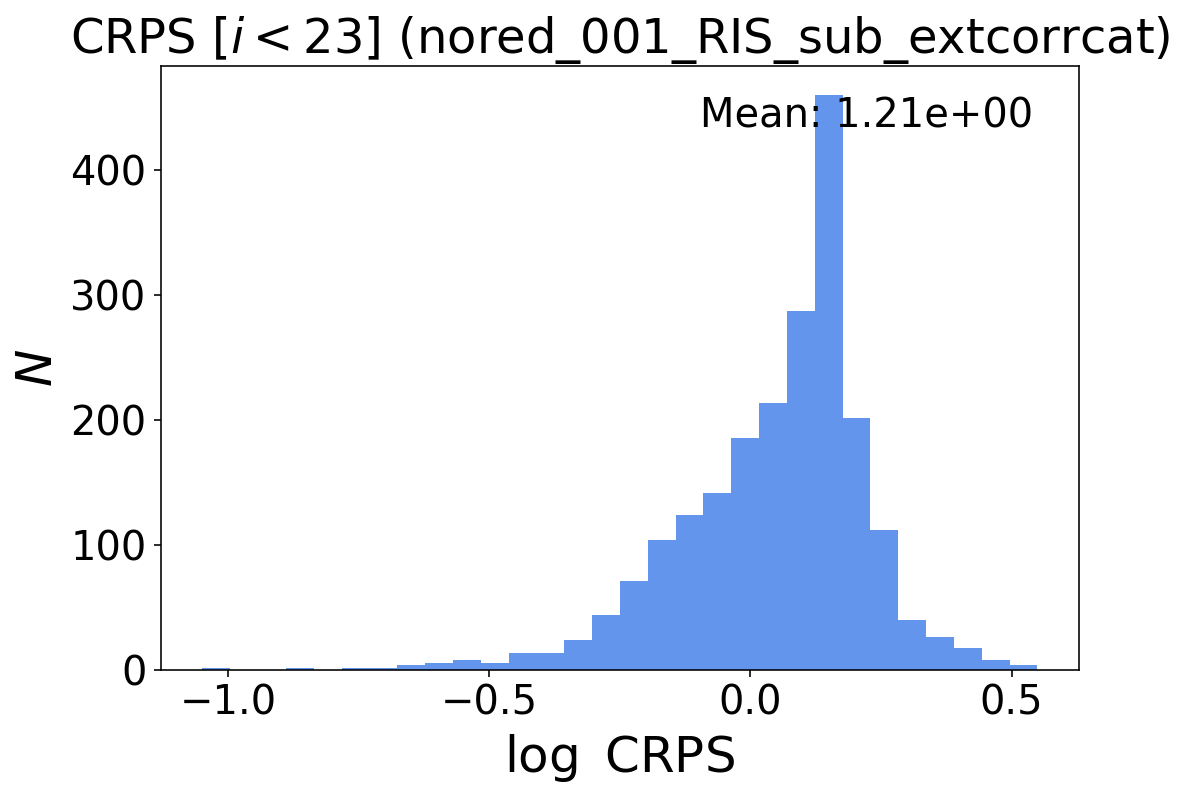

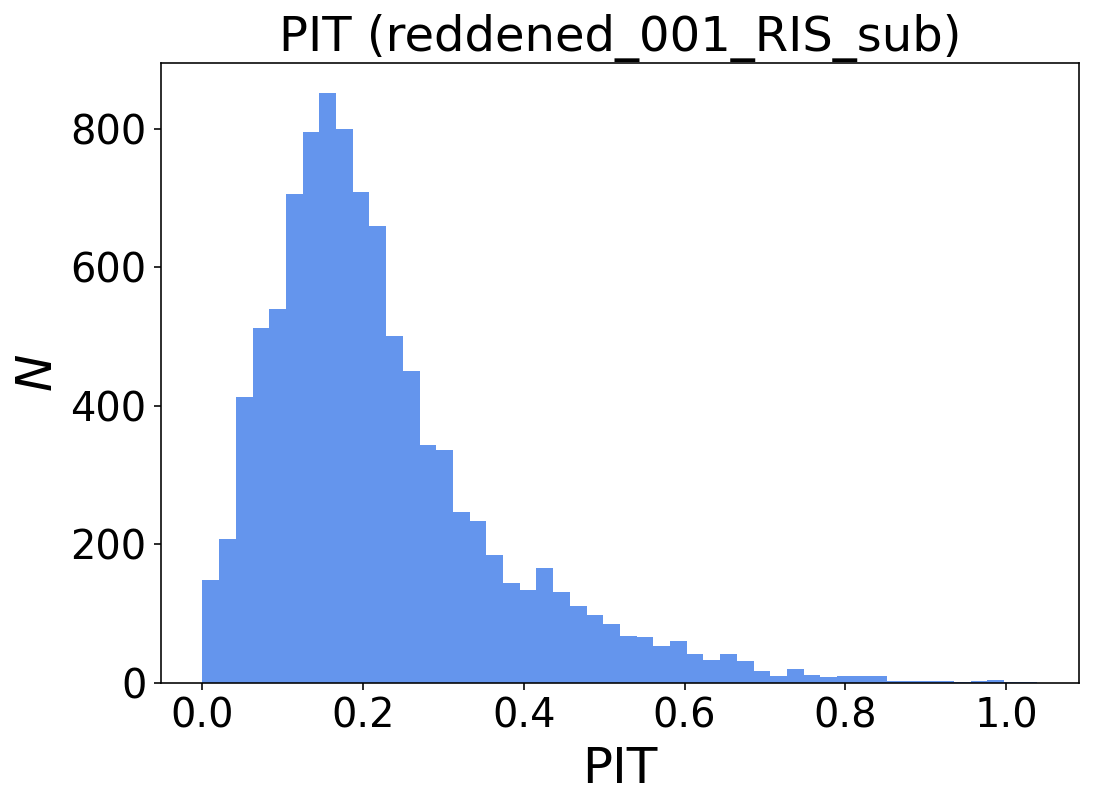

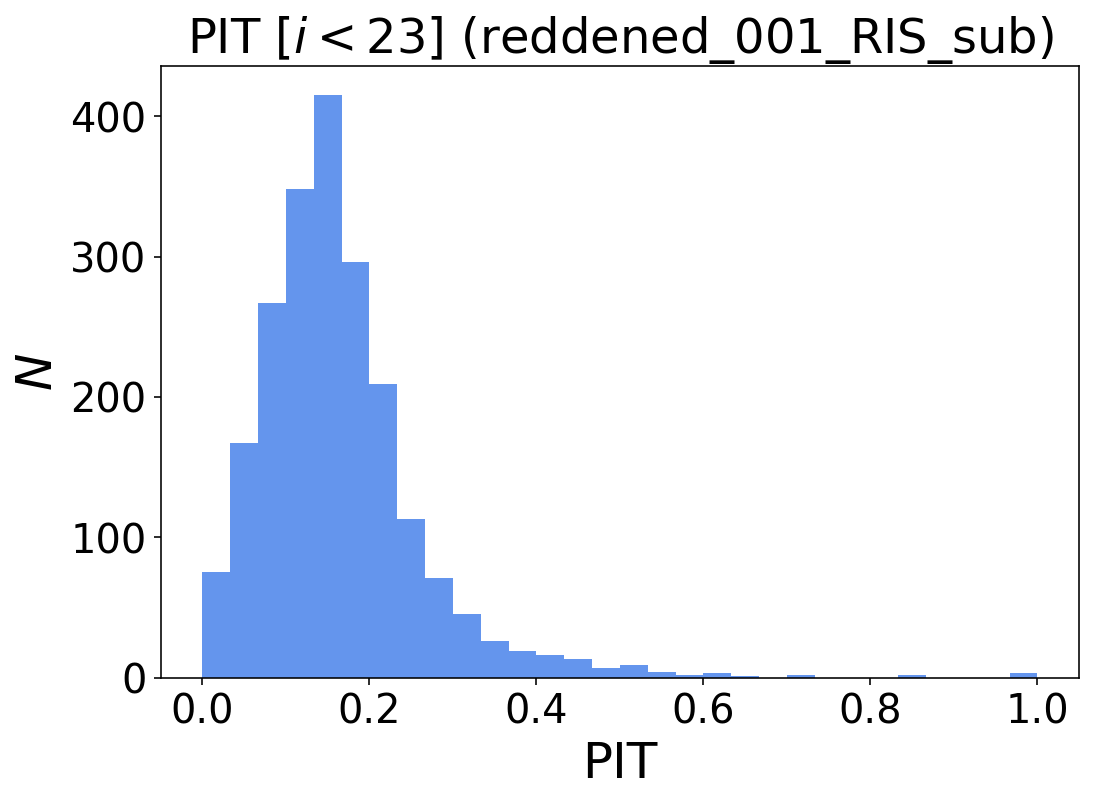

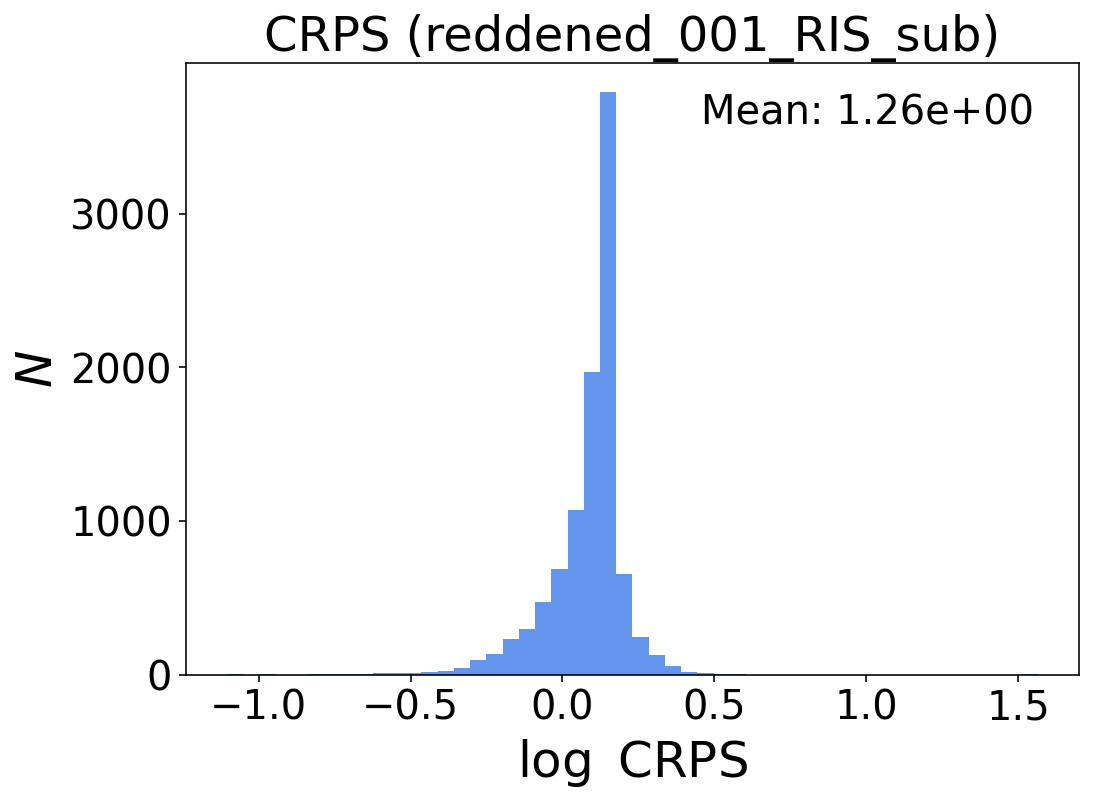

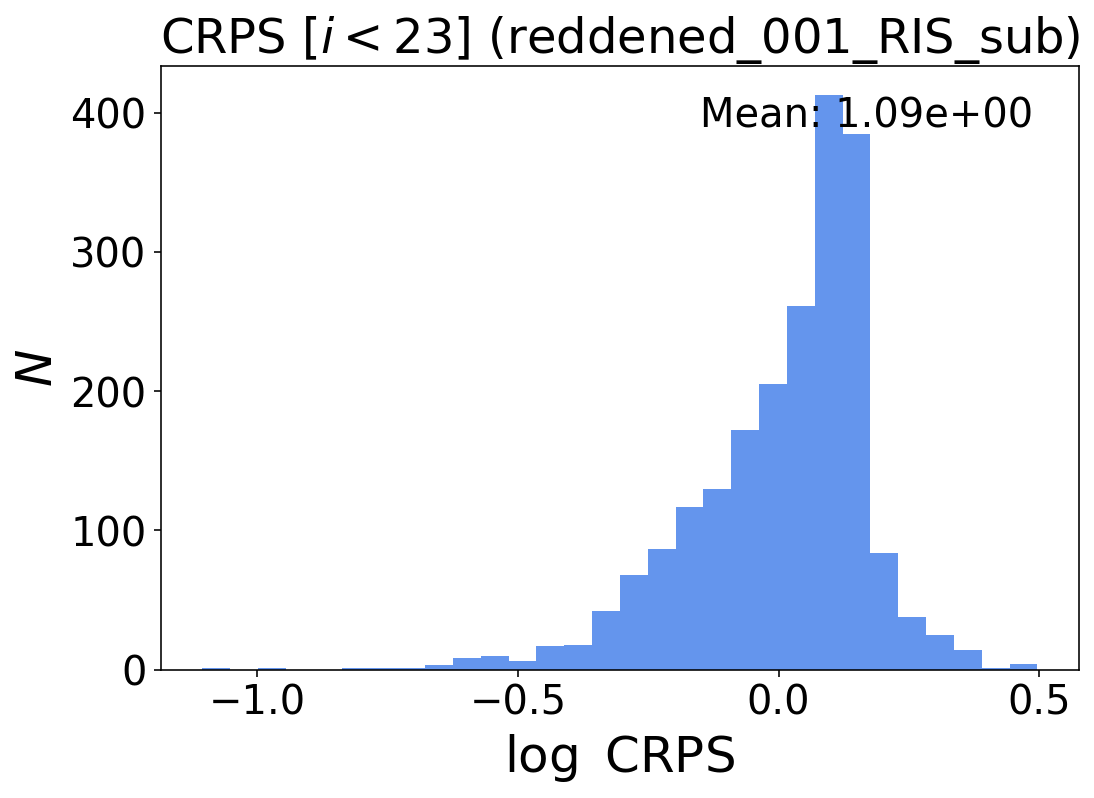

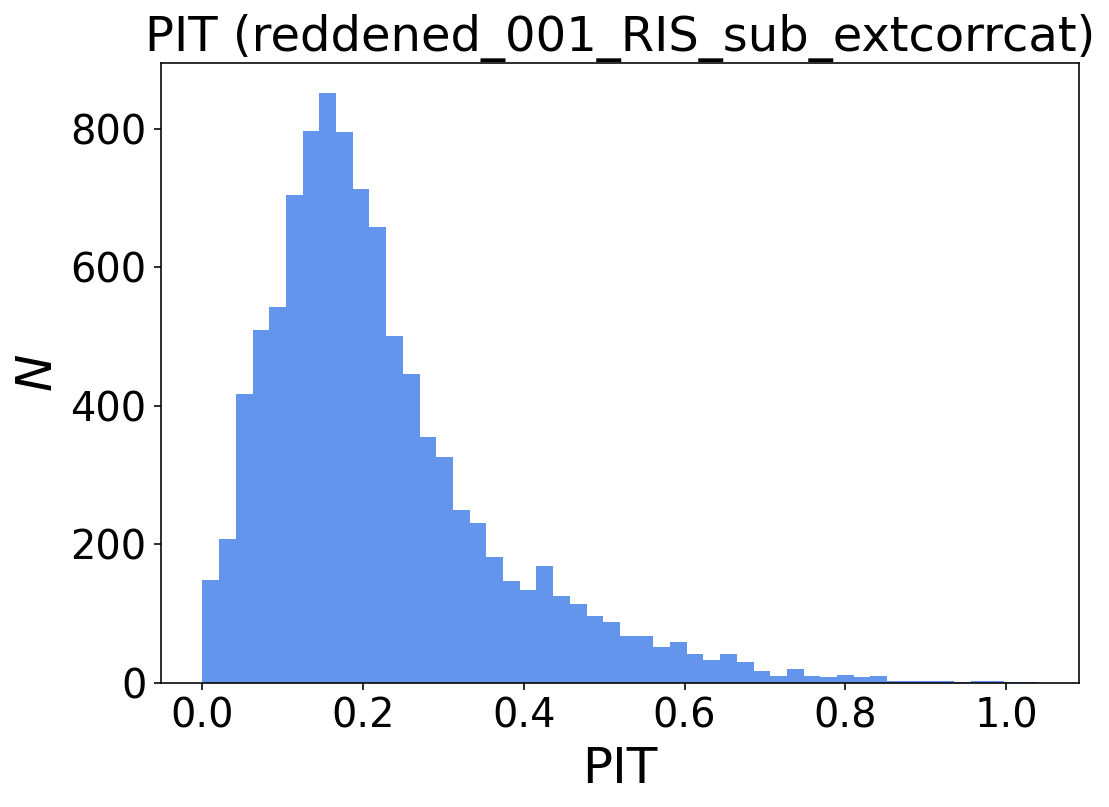

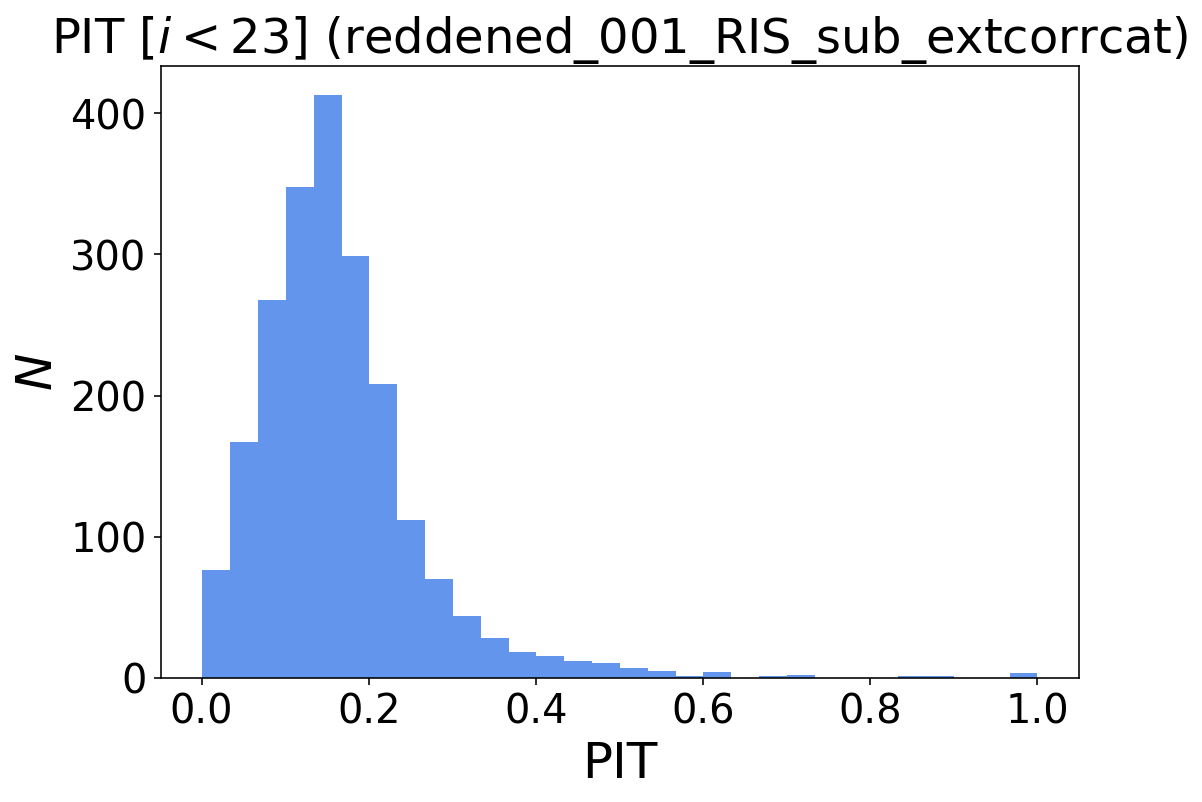

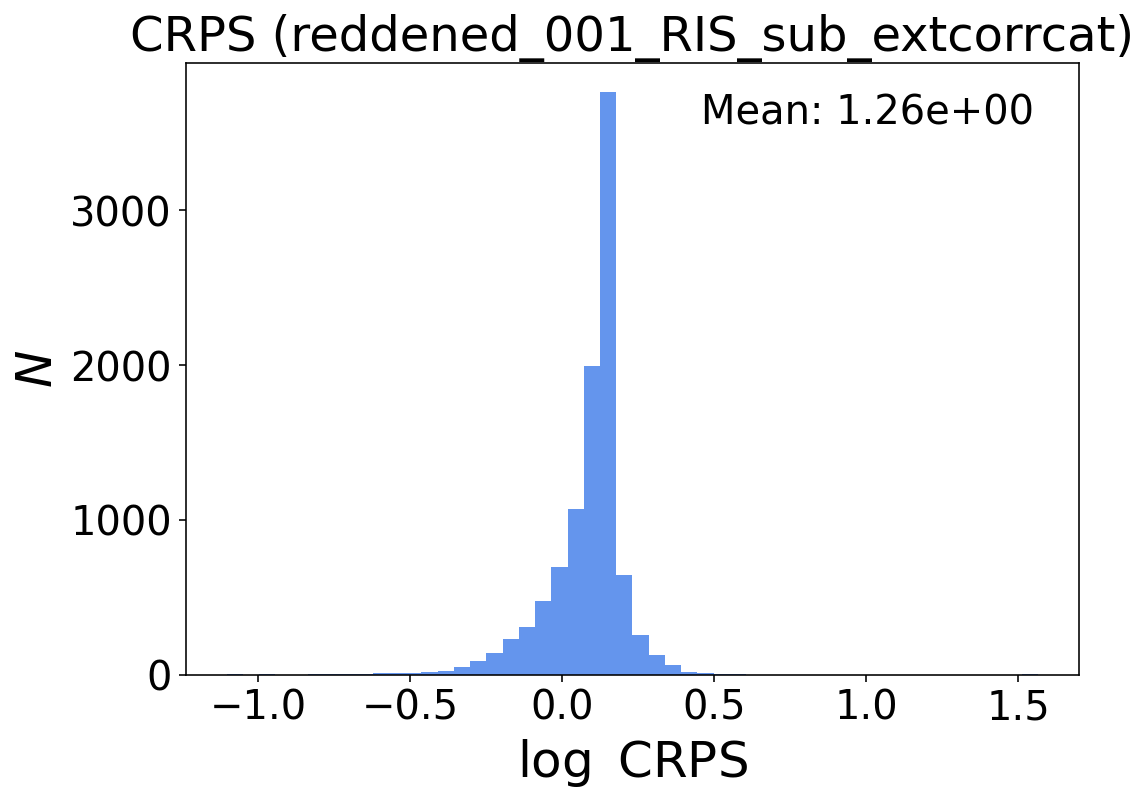

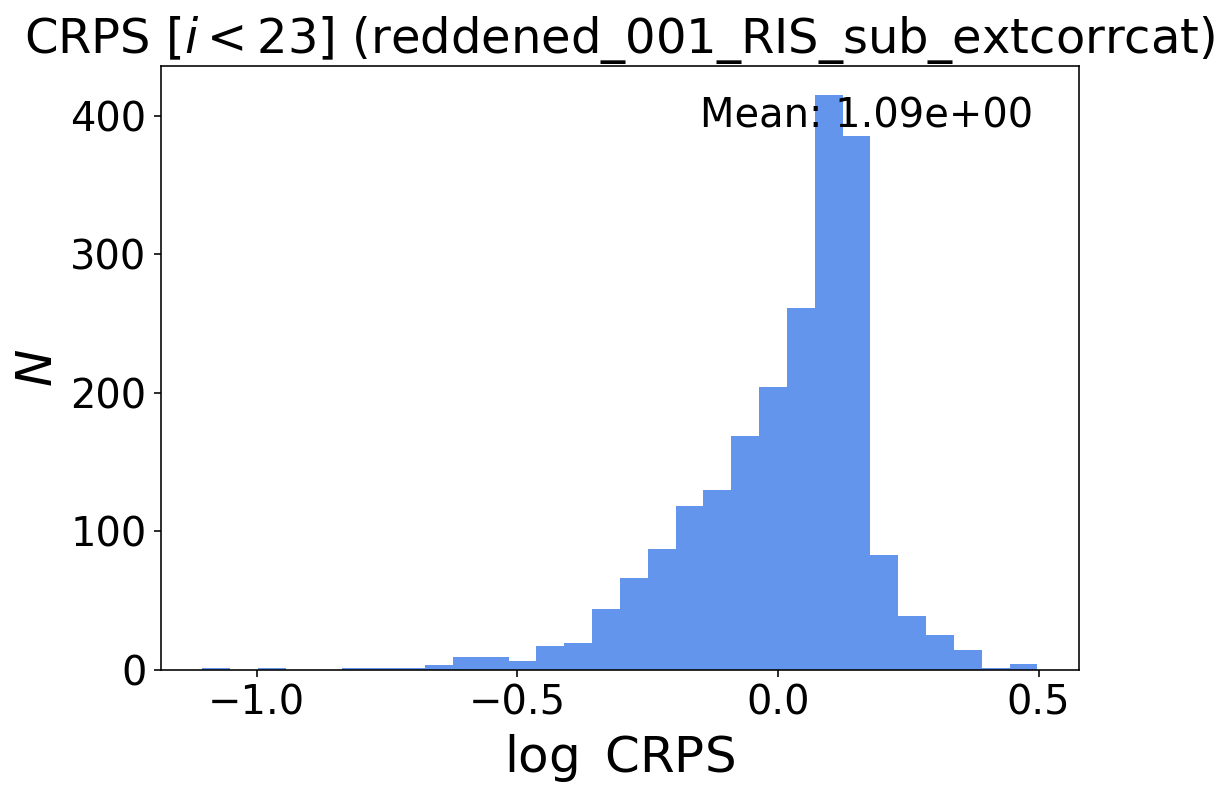

In [78]:
catalog = "_sub"
zstep = "001"
for surv in ["IMS", "WFS", "RIS"]:
    for temp in ["nored", "reddened"]:
        for extc in ["", "_extcorrcat"]:
            base = Table.read(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/result.fits')
            figdir = WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/figures'
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.hist(base["pit"], bins=50, histtype="stepfilled", lw=1, color="cornflowerblue")
            ax.set_xlabel("PIT")
            ax.set_ylabel(r"$N$")
            ax.set_title(f"PIT ({temp}_{zstep}_{surv}{catalog}{extc})")
            fig.tight_layout()
            fig.savefig(figdir/"pit_hist.png")
            # plt.close()
            
            imask = base["HSC_i_MAG"] < 23
            
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.hist(base["pit"][imask], bins=30, histtype="stepfilled", lw=1, color="cornflowerblue")
            ax.set_xlabel("PIT")
            ax.set_ylabel(r"$N$")
            ax.set_title(r"PIT [$i<23$] "+f"({temp}_{zstep}_{surv}{catalog}{extc})")
            fig.tight_layout()
            fig.savefig(figdir/"pit_hist_i23.png")
            # plt.close()
            
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.hist(np.log10(base["crps"]), bins=50, histtype="stepfilled", lw=1, color="cornflowerblue")
            ax.set_xlabel(r"$\log$ CRPS")
            ax.set_ylabel(r"$N$")
            ax.set_title(f"CRPS ({temp}_{zstep}_{surv}{catalog}{extc})")
            ax.text(0.95, 0.95, f"Mean: {np.mean(base['crps']):.2e}", transform=ax.transAxes, ha="right", va="top")
            fig.tight_layout()
            fig.savefig(figdir/"crps_hist.png")
            # plt.close()
            
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.hist(np.log10(base["crps"][imask]), bins=30, histtype="stepfilled", lw=1, color="cornflowerblue")
            ax.set_xlabel(r"$\log$ CRPS")
            ax.set_ylabel(r"$N$")
            ax.set_title(r"CRPS [$i<23$] "+f"({temp}_{zstep}_{surv}{catalog}{extc})")
            ax.text(0.95, 0.95, f"Mean: {np.mean(base['crps'][imask]):.2e}", transform=ax.transAxes, ha="right", va="top")
            fig.tight_layout()
            fig.savefig(figdir/"crps_hist_i23.png")

Calculating CRPS: 100%|██████████| 10000/10000 [00:06<00:00, 1448.82it/s]


Objects : 9981
Outliers: 5092




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1273
Outliers: 157




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1273
Outliers: 157




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 7868
Outliers: 4927




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7868
Outliers: 4927




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 2426
Outliers: 176




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 2426
Outliers: 176




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 852
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 852
Outliers: 8




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
Calculating CRPS: 100%|██████████| 10000/10000 [00:04<00:00, 2357.38it/s]


Objects : 9882
Outliers: 6448




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 37




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 521
Outliers: 37




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1273
Outliers: 503




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1273
Outliers: 503




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 7769
Outliers: 5908




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7769
Outliers: 5908




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 841
Outliers: 55




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 841
Outliers: 55




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 6




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 6




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
Calculating CRPS: 100%|██████████| 10000/10000 [00:04<00:00, 2340.82it/s]


Objects : 9348
Outliers: 7340




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 21
Outliers: 0


Objects : 21
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 3




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 89
Outliers: 3




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 42




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 209
Outliers: 42




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 517
Outliers: 235




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 517
Outliers: 235




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1217
Outliers: 838




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 1217
Outliers: 838




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7295
Outliers: 6222




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


Objects : 7295
Outliers: 6222




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:80: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))
/data1/hbahk/spherex-photoz/spherex-challenge/7ds_challenge/utils.py:389: RuntimeWarning: divide by zero encountered in divide
  np.max([base["z840"] - base["z_phot"], base["z_phot"] - base["z160"]], axis=0)


Objects : 110
Outliers: 18




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 110
Outliers: 18




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Objects : 1
Outliers: 0




/data1/hbahk/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


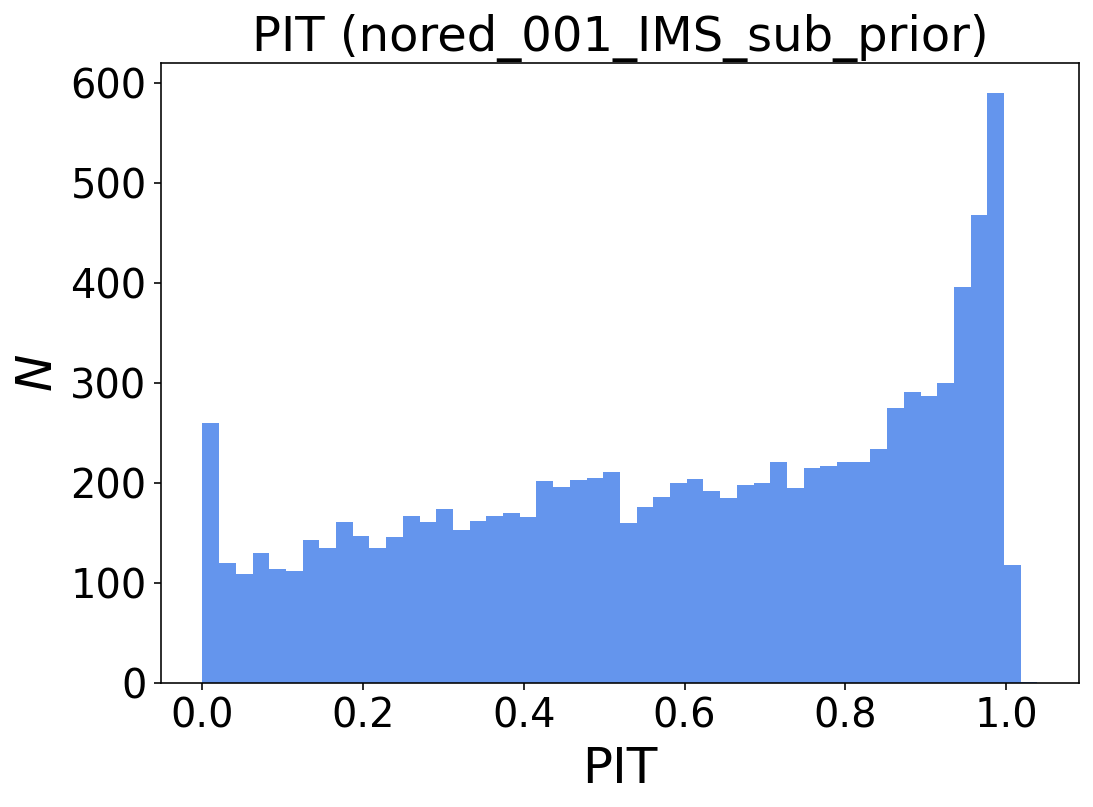

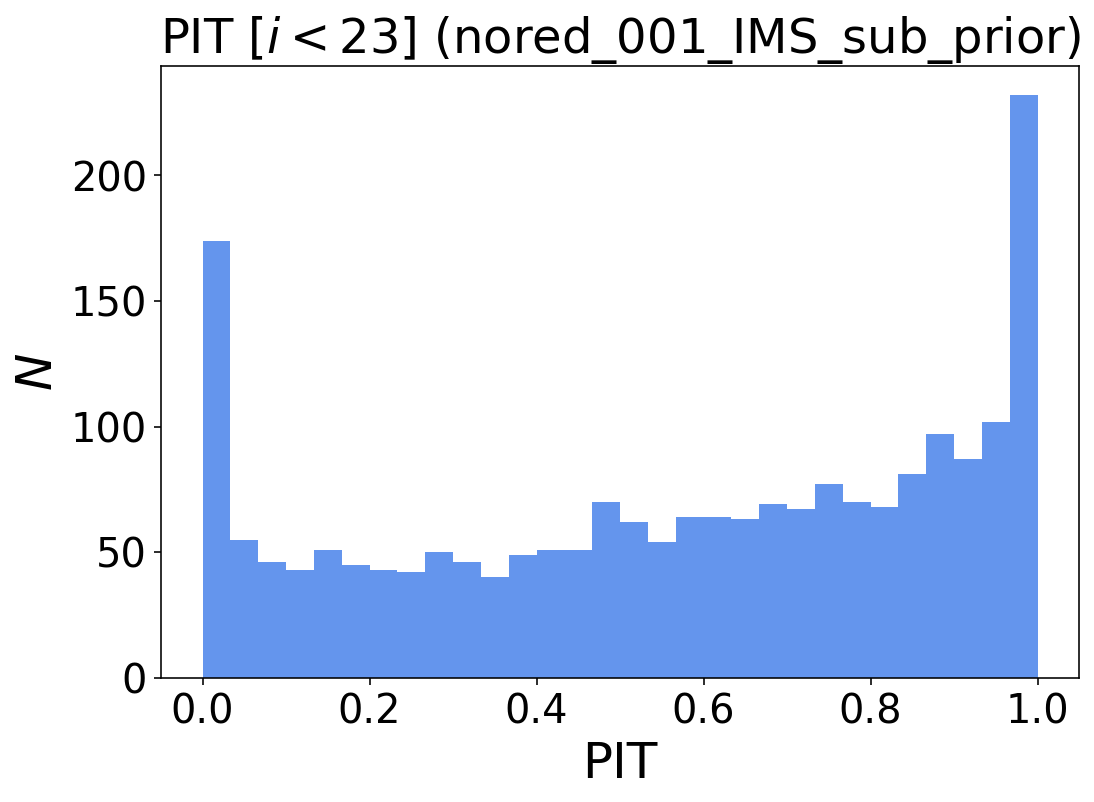

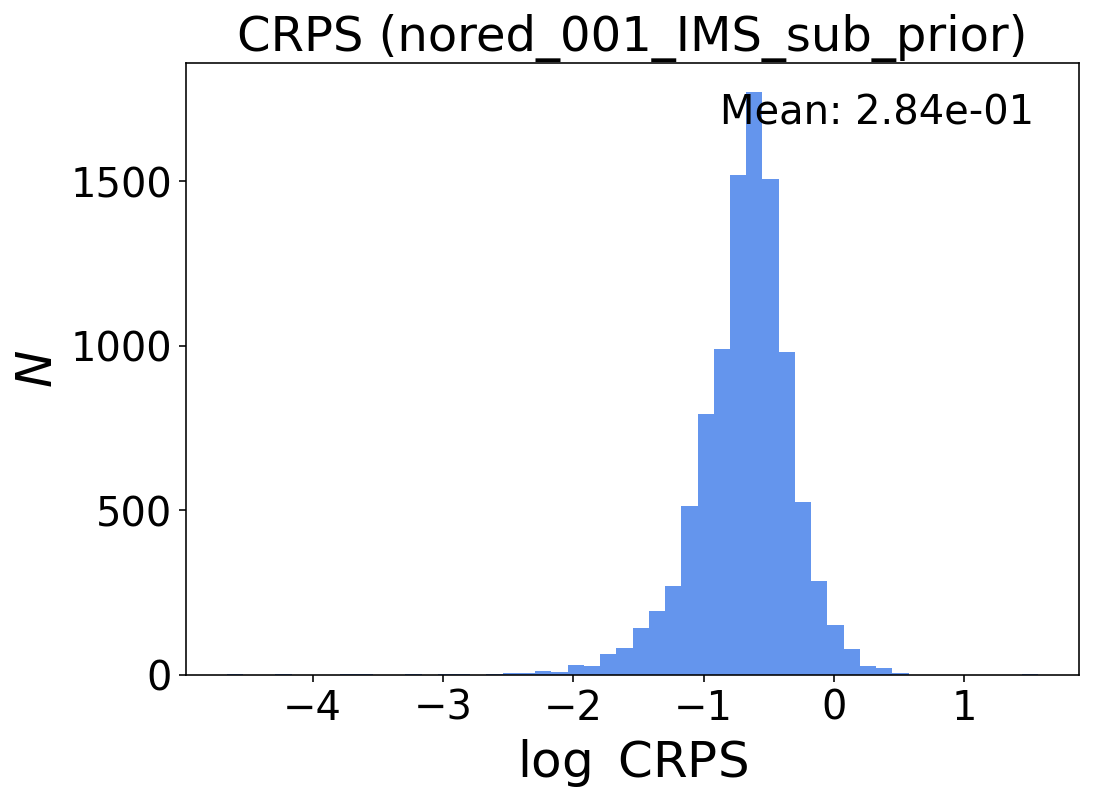

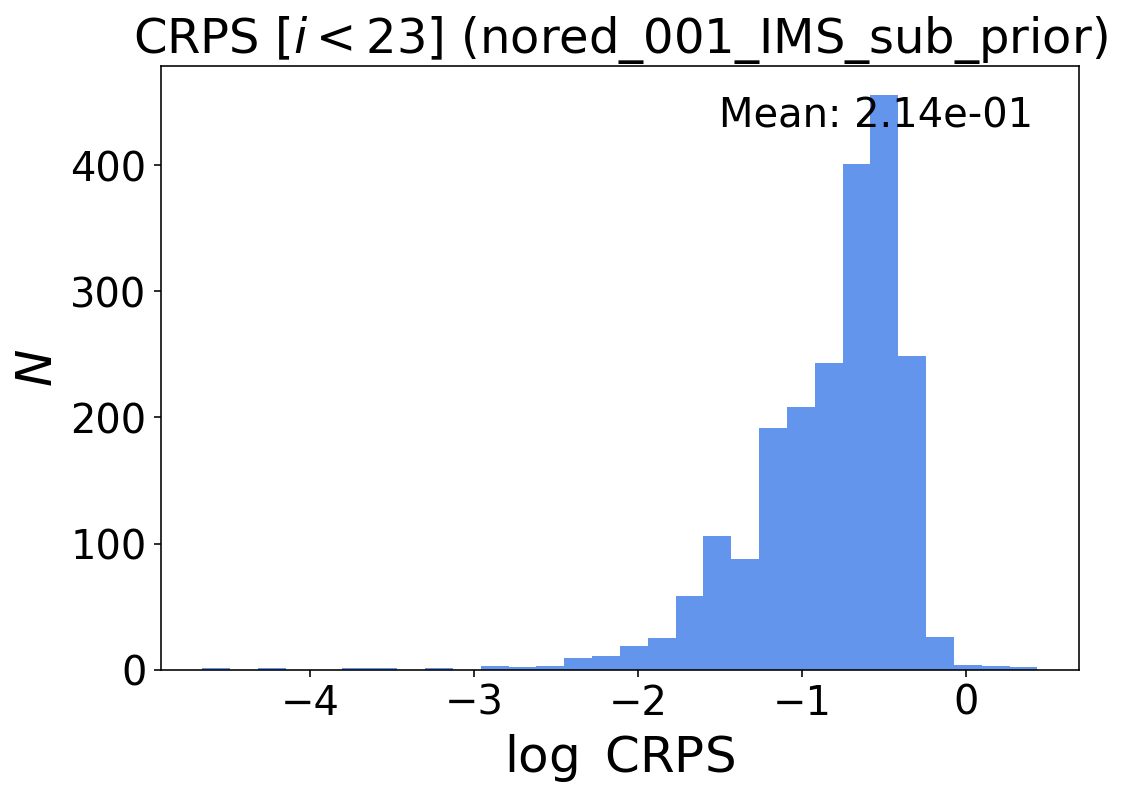

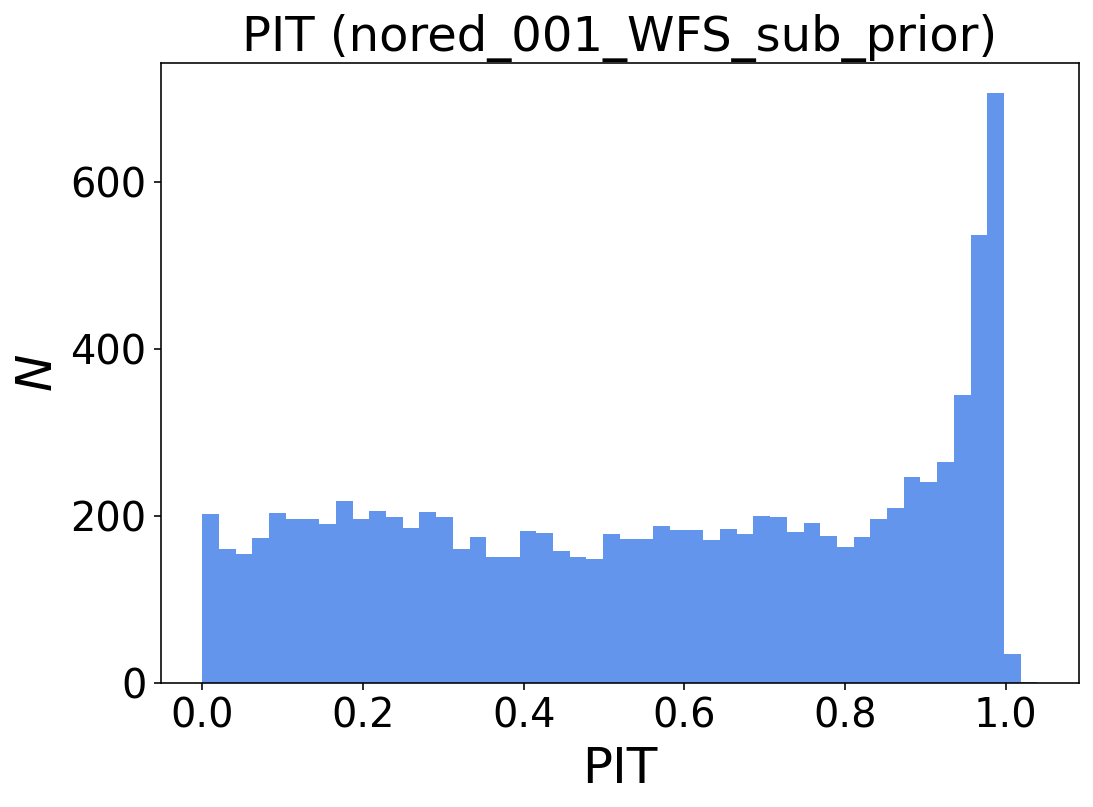

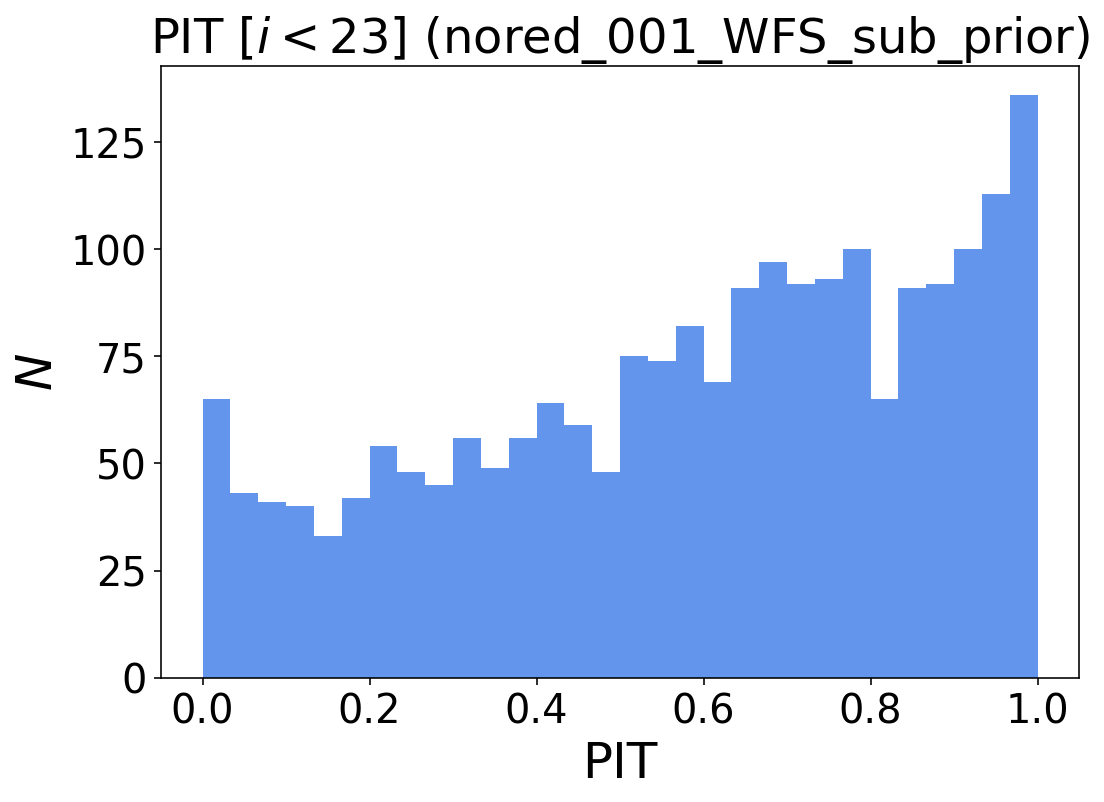

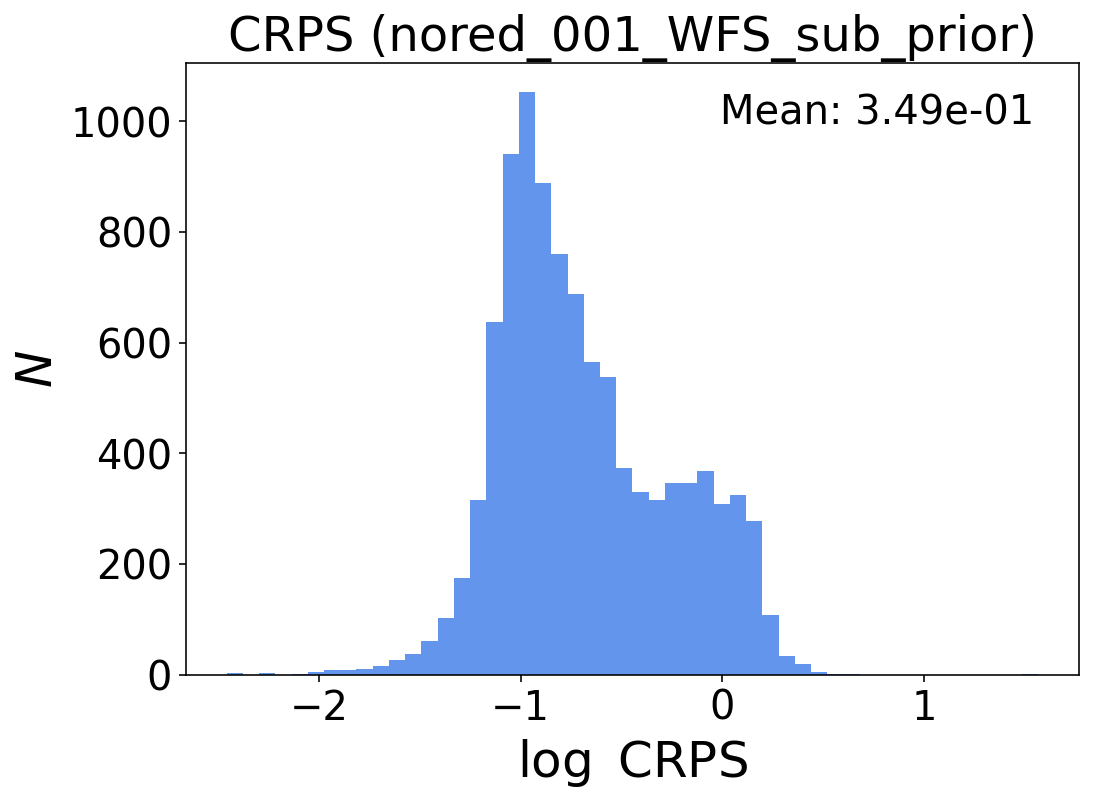

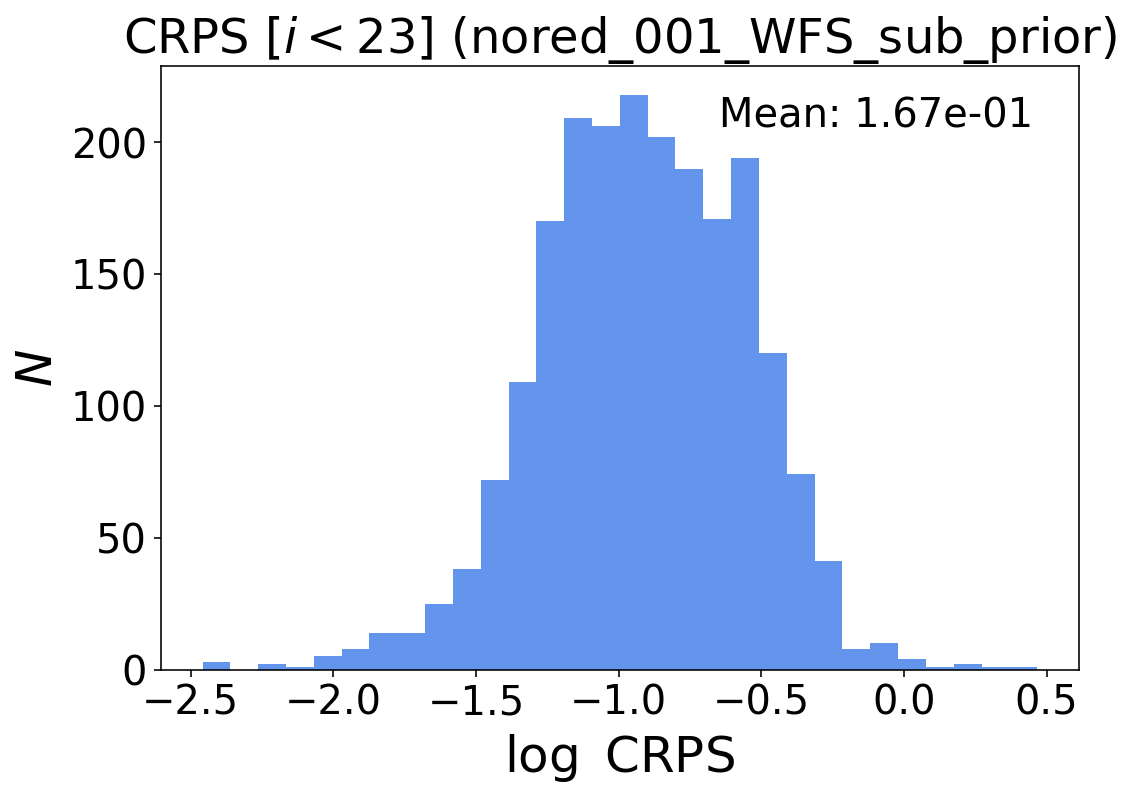

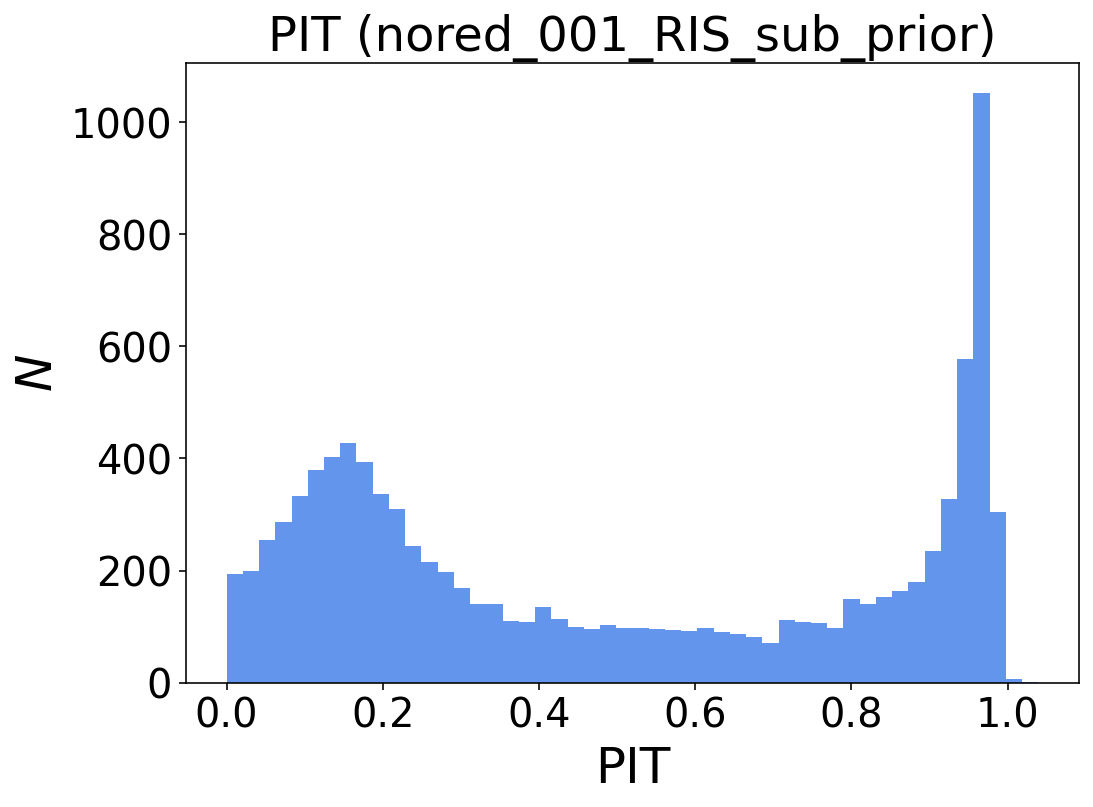

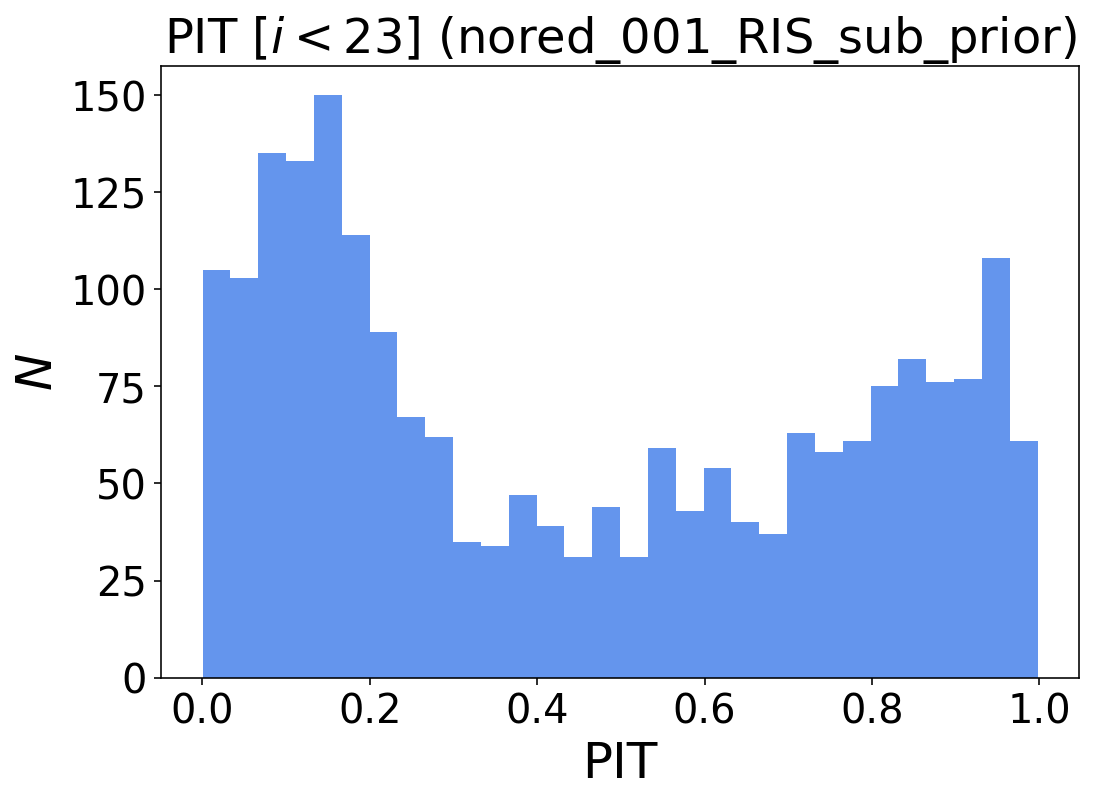

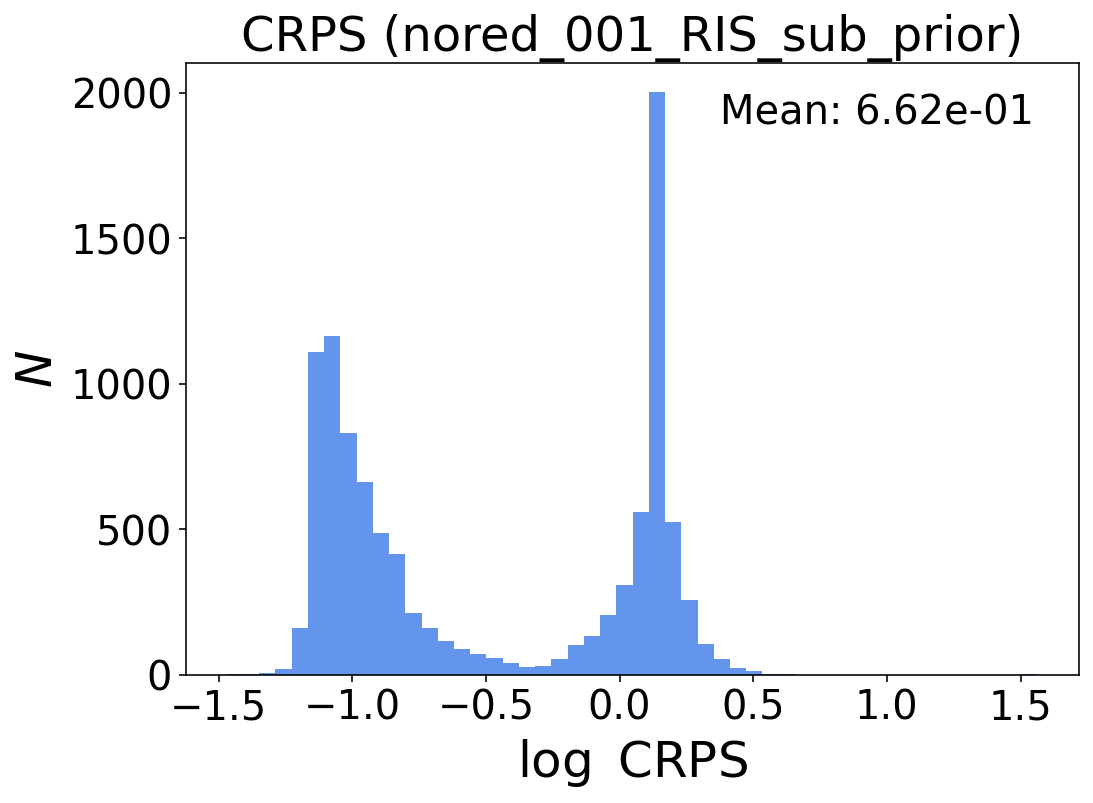

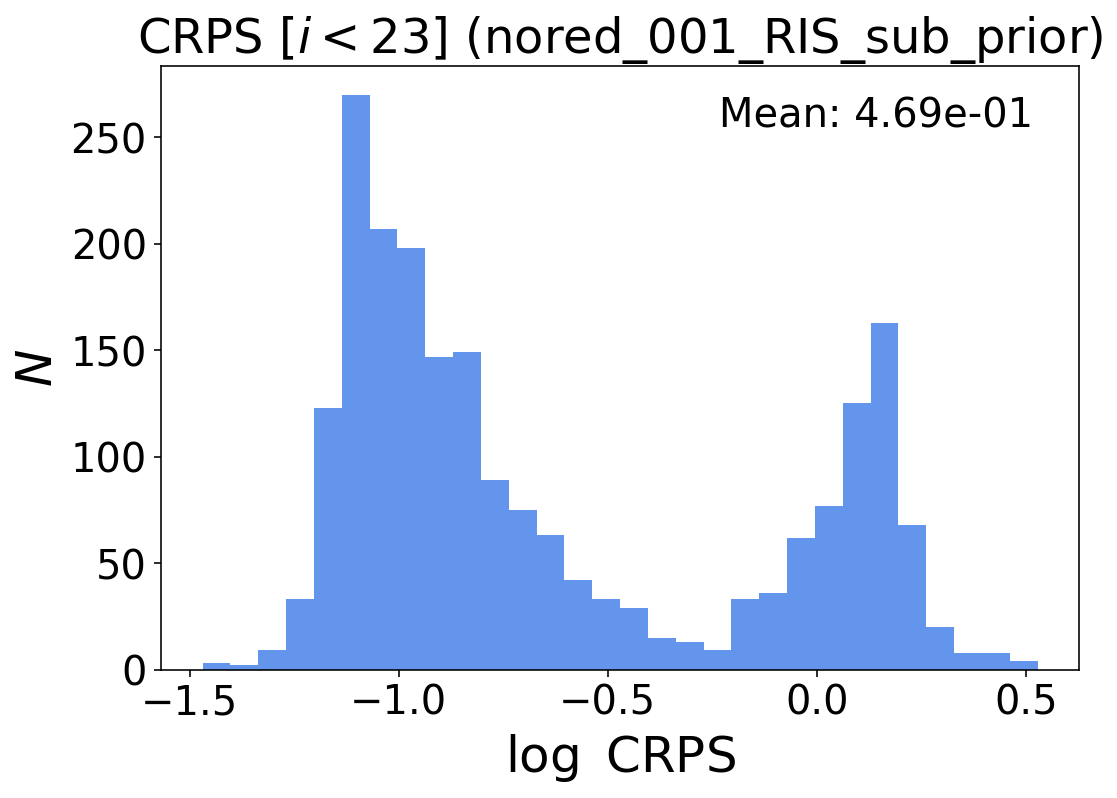

In [80]:
catalog = "_sub"
zstep = "001"
temp = "nored"
survey = "RIS"
extc = "_prior"
for surv in ["IMS", "WFS", "RIS"]:
    scheme, base, figdir = get_basecat_scheme(
        survey=surv,
        template=temp,
        zstep=zstep,
        catalog=catalog,
        extcorr=extc,
    )
    
    base = Table.read(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/result.fits')
    
    lnp = fits.getdata(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/lnp.fits')
    zgrid = zgrid_reddened if temp == "reddened" else zgrid_nored
    trdz = trdz_reddened if temp == "reddened" else trdz_nored
    pit = get_pit(base["z_spec"], zgrid, lnp, trdz)
    crps = get_crps(base["z_spec"], zgrid, lnp, trdz)
    base["pit"] = pit
    base["crps"] = crps
    base.write(WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/result.fits', overwrite=True)
    
    figdir = WD/f'output/output_{temp}_{zstep}_{surv}{catalog}{extc}/figures'
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.hist(base["pit"], bins=50, histtype="stepfilled", lw=1, color="cornflowerblue")
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(f"PIT ({temp}_{zstep}_{surv}{catalog}{extc})")
    fig.tight_layout()
    fig.savefig(figdir/"pit_hist.png")
    # plt.close()
    
    imask = base["HSC_i_MAG"] < 23
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.hist(base["pit"][imask], bins=30, histtype="stepfilled", lw=1, color="cornflowerblue")
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"PIT [$i<23$] "+f"({temp}_{zstep}_{surv}{catalog}{extc})")
    fig.tight_layout()
    fig.savefig(figdir/"pit_hist_i23.png")
    # plt.close()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.hist(np.log10(base["crps"]), bins=50, histtype="stepfilled", lw=1, color="cornflowerblue")
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.set_title(f"CRPS ({temp}_{zstep}_{surv}{catalog}{extc})")
    ax.text(0.95, 0.95, f"Mean: {np.mean(base['crps']):.2e}", transform=ax.transAxes, ha="right", va="top")
    fig.tight_layout()
    fig.savefig(figdir/"crps_hist.png")
    # plt.close()
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.hist(np.log10(base["crps"][imask]), bins=30, histtype="stepfilled", lw=1, color="cornflowerblue")
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"CRPS [$i<23$] "+f"({temp}_{zstep}_{surv}{catalog}{extc})")
    ax.text(0.95, 0.95, f"Mean: {np.mean(base['crps'][imask]):.2e}", transform=ax.transAxes, ha="right", va="top")
    fig.tight_layout()
    fig.savefig(figdir/"crps_hist_i23.png")
    
    base.rename_column('z_spec', 'z_true')
    get_result_figures(base, figdir, scheme)